In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import joblib

In [2]:
data = pd.read_csv('./data/amine_treatment-final.csv', on_bad_lines='skip')
data

,"feed_gas temperature, C","feed_gas pressure, kPa","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,...,degased_amine Propane mol frac,degased_amine i-Butane mol frac,degased_amine n-Butane mol frac,degased_amine i-Pentane mol frac,degased_amine n-Pentane mol frac,degased_amine H2S mol frac,degased_amine H2O mol frac,degased_amine MDEAmine mol frac,degased_amine H2S ppm,degased_amine CO2 ppm
0,52.0,6701.325,259647.0,24.668523,80.705482,0.000000,3217.216383,0.031875,0.633122,0.192729,...,0.000004,1.979803e-06,6.785930e-06,3.039502e-08,1.629357e-07,0.014838,0.910916,0.062270,22521.880092,23245.607009
1,40.0,6701.325,63853.0,23.411939,79.292250,0.000000,805.286774,0.039520,0.681947,0.179992,...,0.000006,1.099164e-07,7.886635e-07,2.425456e-06,2.679624e-08,0.010470,0.896612,0.077190,15891.219056,30468.484150
2,46.0,6701.325,15928.0,27.803853,108.358884,0.000000,146.993024,0.027859,0.577870,0.163095,...,0.000018,5.179434e-05,2.863001e-05,4.721545e-06,1.359401e-06,0.001284,0.860268,0.132676,1949.372531,10648.306282
3,36.0,6701.325,150276.0,22.053344,74.092459,0.000000,2028.222609,0.005420,0.856717,0.000249,...,0.000039,8.734358e-06,3.706189e-05,5.426945e-05,3.949909e-06,0.001233,0.809722,0.184359,1871.528366,8438.736973
4,12.0,6701.325,52691.0,24.334510,114.182302,0.002870,461.460940,0.027297,0.694634,0.091063,...,0.000100,7.719691e-05,2.661312e-05,1.351350e-05,6.619552e-06,0.003300,0.788340,0.200715,5008.207346,14011.150105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512795,18.0,6701.325,278813.0,27.267819,147.437736,0.239690,1890.816202,0.036621,0.666807,0.042159,...,0.000053,1.226987e-04,3.336251e-05,4.145371e-06,8.510407e-06,0.002101,0.796328,0.187149,3188.443718,27411.897443
512796,33.0,6701.325,72612.0,26.629816,112.530303,0.000000,645.266193,0.025383,0.605142,0.150361,...,0.000049,8.271254e-05,1.199104e-05,1.810930e-06,4.749955e-06,0.003784,0.826966,0.162727,5742.847844,11941.343733
512797,17.0,6701.325,272718.0,26.290335,135.390018,0.133398,2014.180541,0.039356,0.606850,0.167318,...,0.000037,2.874297e-05,3.343060e-06,1.045919e-05,2.187381e-06,0.045335,0.725301,0.179546,68812.636471,97071.672175
512798,59.0,6701.325,75970.0,24.231673,73.727565,0.000000,1030.415146,0.037951,0.732049,0.086286,...,0.000013,1.782460e-05,8.286743e-06,5.417825e-06,2.393693e-07,0.002551,0.877567,0.106280,3871.441495,26287.366187


In [3]:
data['rich_amine molar flow, kgmol/h'] = data['rich_amine mass flow, kg/h'] / data['rich_amine molecular weight']


data['rich_amine H2S molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine H2S mol frac']
data['rich_amine CO2 molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine CO2 mol frac']
data['rich_amine Methane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Methane mol frac']
data['rich_amine Ethane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Ethane mol frac']
data['rich_amine Propane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Propane mol frac']
data['rich_amine i-Butane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine i-Butane mol frac']
data['rich_amine n-Butane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine n-Butane mol frac']
data['rich_amine i-Pentane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine i-Pentane mol frac']
data['rich_amine n-Pentane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine n-Pentane mol frac']
data['rich_amine H2O molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine H2O mol frac']
data['rich_amine MDEAmine molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine MDEAmine mol frac']
data['rich_amine sour comp molar flow, kgmol/h'] = data['rich_amine H2S molar flow, kgmol/h'] + data['rich_amine CO2 molar flow, kgmol/h']

data['feed_gas molar flow, kgmol/h'] = data['feed_gas mass flow, kg/h'] / data['feed_gas molecular weight']
data['feed_gas H2S molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas H2S mol frac']
data['feed_gas CO2 molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas CO2 mol frac']
data['feed_gas Methane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Methane mol frac']
data['feed_gas Ethane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Ethane mol frac']
data['feed_gas Propane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Propane mol frac']
data['feed_gas i-Butane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas i-Butane mol frac']
data['feed_gas n-Butane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas n-Butane mol frac']
data['feed_gas i-Pentane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas i-Pentane mol frac']
data['feed_gas n-Pentane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas n-Pentane mol frac']
data['feed_gas H2O molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas H2O mol frac']
data['feed_gas MDEAmine molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas MDEAmine mol frac']


data['lean_amine molar flow, kgmol/h'] = data['lean_amine mass flow, kg/h'] / data['lean_amine molecular weight']
data['lean_amine H2S molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine H2S mol frac']
data['lean_amine CO2 molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine CO2 mol frac']
data['lean_amine Methane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Methane mol frac']
data['lean_amine Ethane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Ethane mol frac']
data['lean_amine Propane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Propane mol frac']
data['lean_amine i-Butane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine i-Butane mol frac']
data['lean_amine n-Butane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine n-Butane mol frac']
data['lean_amine i-Pentane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine i-Pentane mol frac']
data['lean_amine n-Pentane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine n-Pentane mol frac']
data['lean_amine H2O molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine H2O mol frac']
data['lean_amine MDEAmine molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine MDEAmine mol frac']

data['sweet_gas molar flow, kgmol/h'] = data['sweet_gas mass flow, kg/h'] / data['sweet_gas molecular weight']
data['sweet_gas H2S molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas H2S mol frac']
data['sweet_gas CO2 molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas CO2 mol frac']
data['sweet_gas Methane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Methane mol frac']
data['sweet_gas Ethane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Ethane mol frac']
data['sweet_gas Propane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Propane mol frac']
data['sweet_gas i-Butane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas i-Butane mol frac']
data['sweet_gas n-Butane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas n-Butane mol frac']
data['sweet_gas i-Pentane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas i-Pentane mol frac']
data['sweet_gas n-Pentane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas n-Pentane mol frac']
data['sweet_gas H2O molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas H2O mol frac']
data['sweet_gas MDEAmine molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas MDEAmine mol frac']

In [4]:
def plot_scatter_with_ideal_line(y_pred, y_test):
    """
    Визуализирует диаграмму разброса с линией идеального соответствия для y_pred и y_test.
    
    Args:
    y_pred (array-like): Предсказанные значения модели.
    y_test (array-like): Истинные значения.

    """
    # Преобразуем y_test в массив numpy, если это pandas Series
    if isinstance(y_test, pd.Series):
        y_test = y_test.values
    
    # Создаем диаграмму разброса
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    
    # Добавляем линию идеального соответствия
    max_value = np.max([np.max(y_test), np.max(y_pred)])
    min_value = np.min([np.min(y_test), np.min(y_pred)])
    plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Идеальное соответствие')
    
    # Добавляем подписи и заголовок
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Диаграмма разброса: Истинные значения vs. Предсказанные значения')
    plt.legend()
    
    # Показываем график
    plt.show()

# Определение молярного расхода верха колонны

In [109]:
column_top_molar_flow_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
]]

In [110]:
column_top_molar_flow_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas molar flow, kgmol/h","feed_gas H2S molar flow, kgmol/h","feed_gas CO2 molar flow, kgmol/h","feed_gas Methane molar flow, kgmol/h","feed_gas Ethane molar flow, kgmol/h","feed_gas Propane molar flow, kgmol/h",...,"lean_amine temperature, C","lean_amine mass flow, kg/h",lean_amine molecular weight,"lean_amine Mass density, kg/m3","lean_amine molar flow, kgmol/h","lean_amine H2S molar flow, kgmol/h","lean_amine CO2 molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas molar flow, kgmol/h"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,...,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,5870.716712,116.240769,131.495260,4009.062337,575.943410,288.120820,...,34.992685,361132.352397,32.744629,1040.235933,11541.804252,2.884096,33.501414,9999.846673,1505.572069,5657.648995
std,14.726834,86277.067509,2.254273,41.131813,3433.502523,102.808912,102.021061,2488.283871,500.307503,250.349018,...,14.695711,196058.939546,6.566487,13.984821,6962.873087,2.095730,25.994329,6497.662992,981.655992,3340.435678
min,10.000000,1000.000000,17.630435,48.732168,33.338025,0.005353,0.207002,16.662736,0.000933,0.000202,...,10.000000,15000.000000,18.043180,973.756588,299.356341,0.035062,0.325252,194.673346,0.006981,0.004180
25%,22.000000,74990.500000,24.160098,85.483707,2916.163761,31.849751,49.448425,1929.630171,161.870547,80.995843,...,22.000000,192367.500000,28.099839,1032.383569,5868.173579,1.269090,13.449371,4897.851465,661.819137,2782.531515
50%,35.000000,149553.500000,25.725828,100.138569,5814.068691,86.399253,105.853246,3841.024204,436.326591,218.194499,...,35.000000,361664.500000,33.812730,1041.412657,11045.326239,2.429430,26.934611,9224.920955,1384.967497,5591.793562
75%,48.000000,224502.000000,27.293888,122.779305,8728.900707,176.810764,193.917310,5821.054095,880.027025,439.906736,...,48.000000,530754.250000,37.526382,1050.665489,16263.162662,4.056679,47.760824,13765.564888,2259.367346,8428.333741
max,60.000000,300000.000000,33.967309,341.551374,16404.642557,598.000656,585.760027,15013.476119,2728.899406,1347.803534,...,60.000000,700000.000000,56.744250,1070.914903,38549.039746,15.147930,190.433750,38445.322887,4640.158398,16132.965175


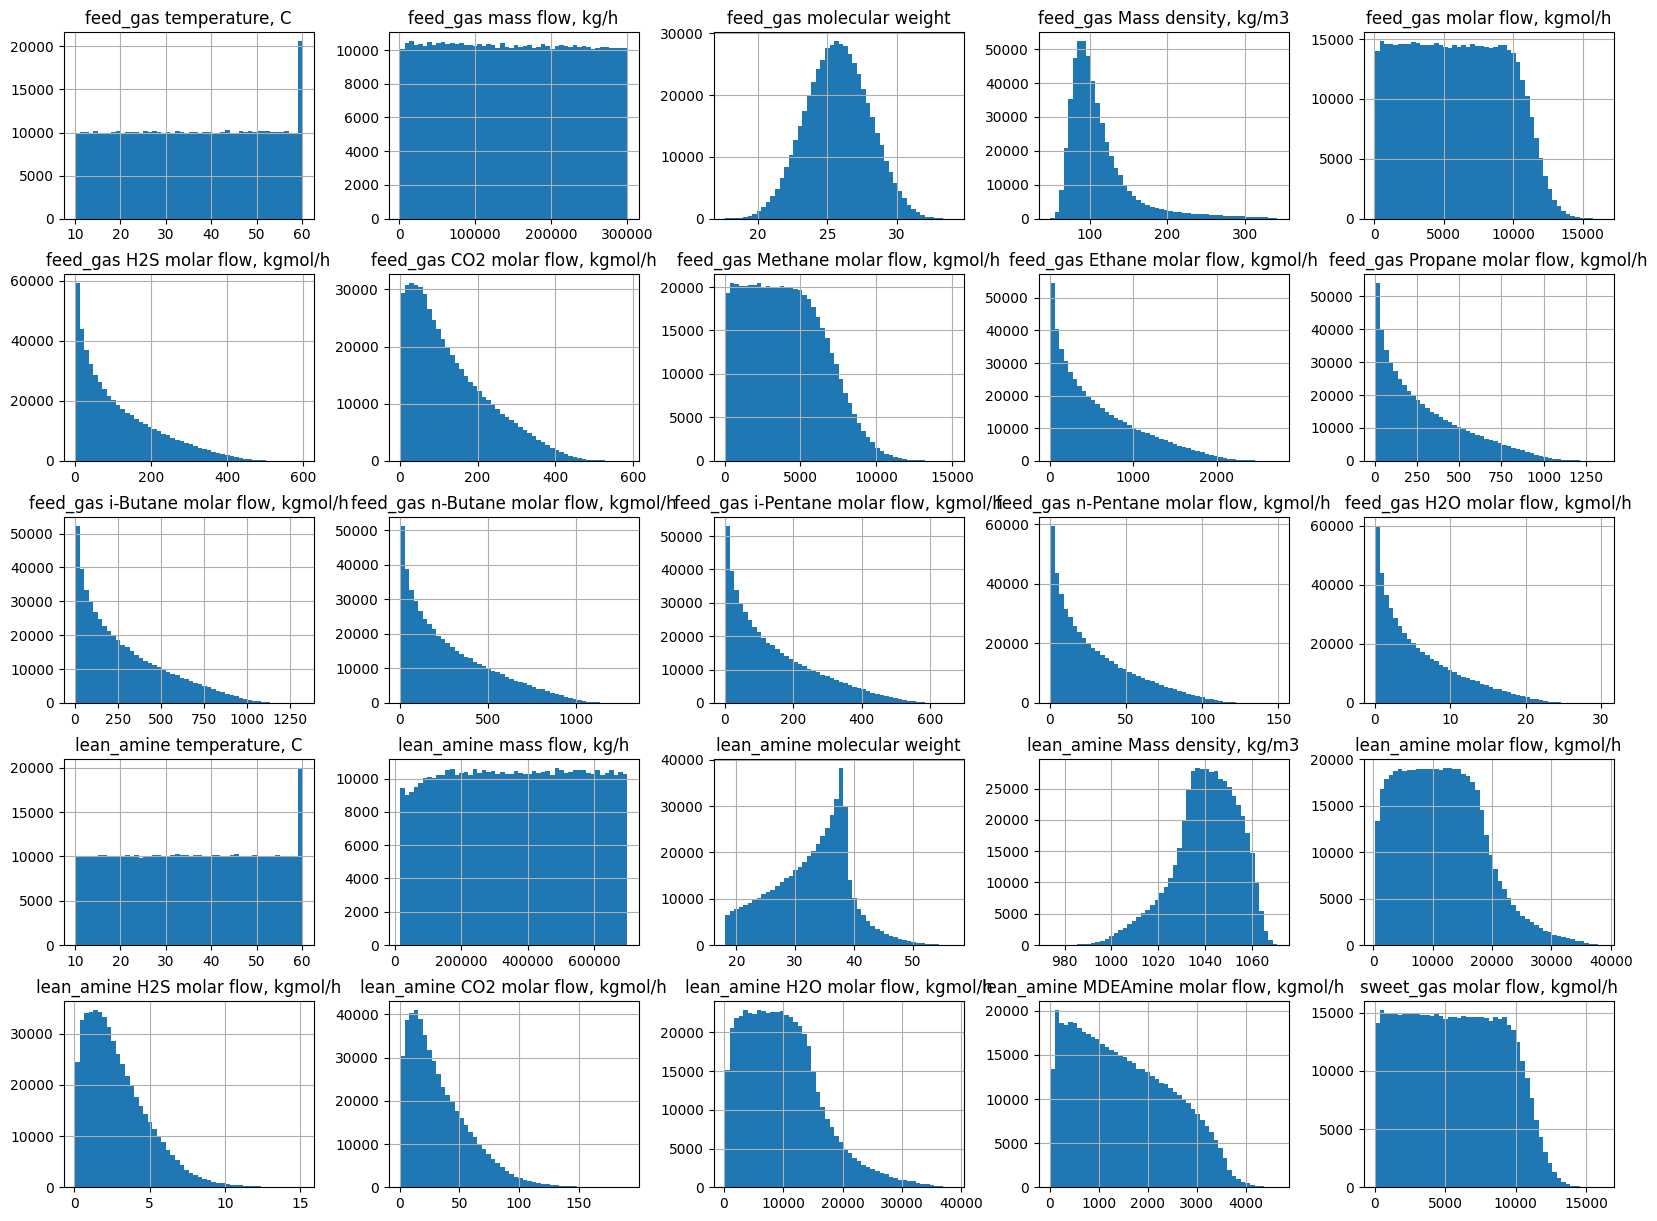

In [111]:
column_top_molar_flow_data.hist(bins=50, figsize=(20, 15));

In [112]:
corr_matrix = column_top_molar_flow_data.corr()

corr_matrix['sweet_gas molar flow, kgmol/h'].sort_values(ascending=False)

sweet_gas molar flow, kgmol/h              1.000000
feed_gas molar flow, kgmol/h               0.999501
feed_gas mass flow, kg/h                   0.983003
feed_gas Methane molar flow, kgmol/h       0.977197
feed_gas CO2 molar flow, kgmol/h           0.731651
feed_gas H2O molar flow, kgmol/h           0.658286
feed_gas n-Pentane molar flow, kgmol/h     0.650699
feed_gas H2S molar flow, kgmol/h           0.629263
feed_gas Ethane molar flow, kgmol/h        0.622286
feed_gas i-Pentane molar flow, kgmol/h     0.622102
feed_gas Propane molar flow, kgmol/h       0.621656
feed_gas n-Butane molar flow, kgmol/h      0.604175
feed_gas i-Butane molar flow, kgmol/h      0.603087
feed_gas temperature, C                    0.003396
lean_amine CO2 molar flow, kgmol/h         0.002378
lean_amine H2O molar flow, kgmol/h         0.001681
lean_amine molar flow, kgmol/h             0.001497
lean_amine H2S molar flow, kgmol/h         0.001023
lean_amine mass flow, kg/h                 0.000674
lean_amine t

In [113]:
column_top_molar_flow_data_mini = column_top_molar_flow_data.sample(frac=0.5)

In [115]:
## Тестовая и обучающая выборки
X = column_top_molar_flow_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
]]

y = column_top_molar_flow_data_mini[[
    'sweet_gas molar flow, kgmol/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((205120, 24), (205120, 1))

In [116]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_0 = column_top_molar_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 7s 1ms/step - loss: 337.4825 - mae: 337.4825
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 34.5352 - mae: 34.5352
Epoch 3/20
6410/6410 [==============================] - 7s 1ms/step - loss: 32.3636 - mae: 32.3636
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 30.0794 - mae: 30.0794
Epoch 5/20
6410/6410 [==============================] - 7s 1ms/step - loss: 27.3839 - mae: 27.3839
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 26.4227 - mae: 26.4227
Epoch 7/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.3552 - mae: 25.3552
Epoch 8/20
6410/6410 [==============================] - 7s 1ms/step - loss: 24.5662 - mae: 24.5662
Epoch 9/20
6410/6410 [==============================] - 7s 1ms/step - loss: 24.0513 - mae: 24.0513
Epoch 10/20
6410/6410 [==============================] - 7s 1ms/step - loss: 23.7134 - mae: 23.7134
Epoch 1

In [117]:
eval_0 = column_top_molar_flow_model_0.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 767us/step - loss: 33.1334 - mae: 33.1334


In [118]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_1 = column_top_molar_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 9s 1ms/step - loss: 188.1147 - mae: 188.1147
Epoch 2/20
6410/6410 [==============================] - 8s 1ms/step - loss: 34.0497 - mae: 34.0497
Epoch 3/20
6410/6410 [==============================] - 8s 1ms/step - loss: 30.8153 - mae: 30.8153
Epoch 4/20
6410/6410 [==============================] - 8s 1ms/step - loss: 28.6478 - mae: 28.6478
Epoch 5/20
6410/6410 [==============================] - 8s 1ms/step - loss: 27.7059 - mae: 27.7059
Epoch 6/20
6410/6410 [==============================] - 8s 1ms/step - loss: 26.6769 - mae: 26.6769
Epoch 7/20
6410/6410 [==============================] - 8s 1ms/step - loss: 26.1798 - mae: 26.1798
Epoch 8/20
6410/6410 [==============================] - 9s 1ms/step - loss: 26.2842 - mae: 26.2842
Epoch 9/20
6410/6410 [==============================] - 9s 1ms/step - loss: 26.2717 - mae: 26.2717
Epoch 10/20
6410/6410 [==============================] - 8s 1ms/step - loss: 25.7817 - mae: 25.7817
Epoch 1

In [119]:
eval_1 = column_top_molar_flow_model_1.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 925us/step - loss: 22.5204 - mae: 22.5204


In [120]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_2 = column_top_molar_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 10s 1ms/step - loss: 141.9430 - mae: 141.9430
Epoch 2/20
6410/6410 [==============================] - 9s 1ms/step - loss: 36.0725 - mae: 36.0725
Epoch 3/20
6410/6410 [==============================] - 10s 1ms/step - loss: 33.0936 - mae: 33.0936
Epoch 4/20
6410/6410 [==============================] - 10s 2ms/step - loss: 31.8978 - mae: 31.8978
Epoch 5/20
6410/6410 [==============================] - 9s 1ms/step - loss: 30.7227 - mae: 30.7227
Epoch 6/20
6410/6410 [==============================] - 9s 1ms/step - loss: 29.9052 - mae: 29.9052
Epoch 7/20
6410/6410 [==============================] - 10s 2ms/step - loss: 29.1796 - mae: 29.1796
Epoch 8/20
6410/6410 [==============================] - 9s 1ms/step - loss: 29.3269 - mae: 29.3269
Epoch 9/20
6410/6410 [==============================] - 9s 1ms/step - loss: 28.8246 - mae: 28.8246
Epoch 10/20
6410/6410 [==============================] - 9s 1ms/step - loss: 28.6541 - mae: 28.6541
Epo

In [121]:
eval_2 = column_top_molar_flow_model_2.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 972us/step - loss: 22.3585 - mae: 22.3585


In [122]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_3 = column_top_molar_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 17s 3ms/step - loss: 138.1490 - mae: 138.1490
Epoch 2/20
6410/6410 [==============================] - 16s 2ms/step - loss: 42.5543 - mae: 42.5543
Epoch 3/20
6410/6410 [==============================] - 16s 3ms/step - loss: 39.2364 - mae: 39.2364
Epoch 4/20
6410/6410 [==============================] - 14s 2ms/step - loss: 37.1438 - mae: 37.1438
Epoch 5/20
6410/6410 [==============================] - 16s 2ms/step - loss: 36.0507 - mae: 36.0507
Epoch 6/20
6410/6410 [==============================] - 14s 2ms/step - loss: 35.2835 - mae: 35.2835
Epoch 7/20
6410/6410 [==============================] - 14s 2ms/step - loss: 33.9033 - mae: 33.9033
Epoch 8/20
6410/6410 [==============================] - 15s 2ms/step - loss: 33.8079 - mae: 33.8079
Epoch 9/20
6410/6410 [==============================] - 16s 2ms/step - loss: 33.4170 - mae: 33.4170
Epoch 10/20
6410/6410 [==============================] - 15s 2ms/step - loss: 32.9886 - mae: 32.98

In [123]:
eval_3 = column_top_molar_flow_model_3.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 1ms/step - loss: 35.6542 - mae: 35.6542


In [124]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_4 = column_top_molar_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 17s 3ms/step - loss: 121.7739 - mae: 121.7739
Epoch 2/20
6410/6410 [==============================] - 17s 3ms/step - loss: 42.6388 - mae: 42.6388
Epoch 3/20
6410/6410 [==============================] - 16s 2ms/step - loss: 40.0624 - mae: 40.0624
Epoch 4/20
6410/6410 [==============================] - 16s 2ms/step - loss: 37.7833 - mae: 37.7833
Epoch 5/20
6410/6410 [==============================] - 15s 2ms/step - loss: 37.4039 - mae: 37.4039
Epoch 6/20
6410/6410 [==============================] - 16s 3ms/step - loss: 36.1568 - mae: 36.1568
Epoch 7/20
6410/6410 [==============================] - 15s 2ms/step - loss: 35.2254 - mae: 35.2254
Epoch 8/20
6410/6410 [==============================] - 17s 3ms/step - loss: 34.1342 - mae: 34.1342
Epoch 9/20
6410/6410 [==============================] - 17s 3ms/step - loss: 32.8209 - mae: 32.8209
Epoch 10/20
6410/6410 [==============================] - 17s 3ms/step - loss: 32.5805 - mae: 32.58

In [125]:
eval_4 = column_top_molar_flow_model_4.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 1ms/step - loss: 21.8317 - mae: 21.8317


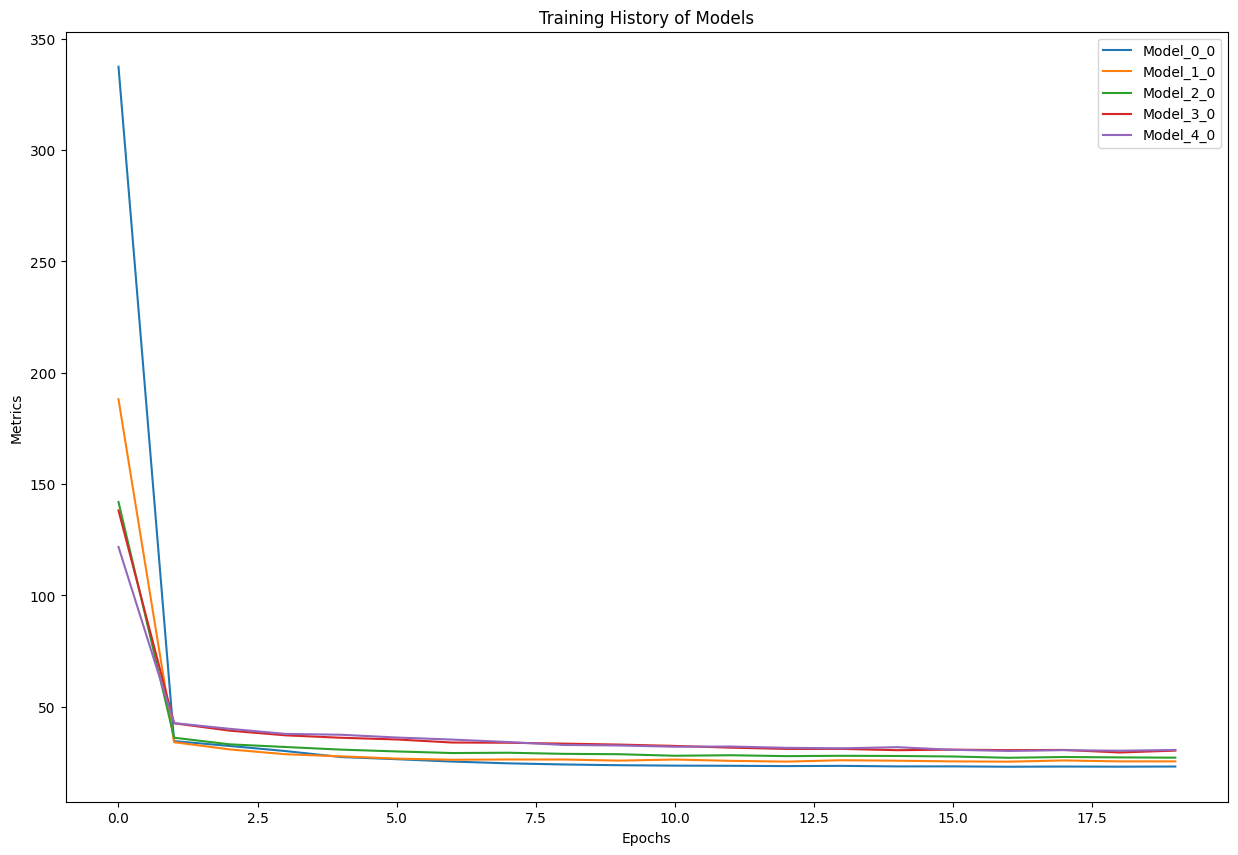

In [126]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(column_top_molar_flow_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(column_top_molar_flow_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(column_top_molar_flow_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(column_top_molar_flow_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(column_top_molar_flow_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

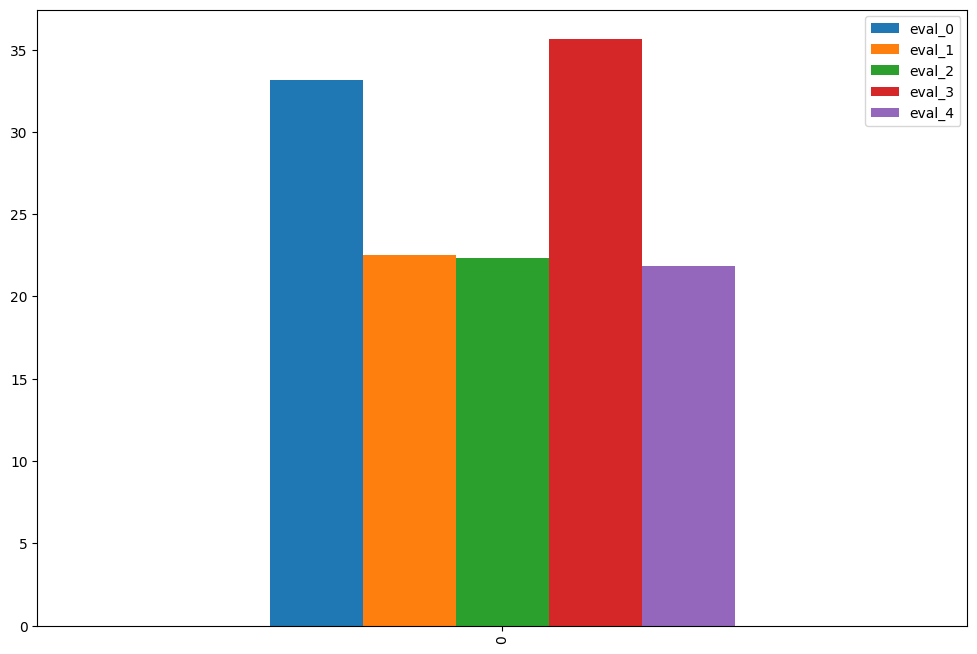

In [127]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения молярного расхода верхнего продукта колонны

In [128]:
## Тестовая и обучающая выборки
X = column_top_molar_flow_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
]]

y = column_top_molar_flow_data[[
    'sweet_gas molar flow, kgmol/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((410240, 24), (410240, 1))

In [ ]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history = column_top_molar_flow_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
12820/12820 [==============================] - 16s 1ms/step - loss: 111.6668 - mae: 111.6668
Epoch 2/50
12820/12820 [==============================] - 15s 1ms/step - loss: 31.1094 - mae: 31.1094
Epoch 3/50
12820/12820 [==============================] - 16s 1ms/step - loss: 27.9402 - mae: 27.9402
Epoch 4/50
12820/12820 [==============================] - 16s 1ms/step - loss: 26.9369 - mae: 26.9369
Epoch 5/50
12820/12820 [==============================] - 16s 1ms/step - loss: 26.4889 - mae: 26.4889
Epoch 6/50
12820/12820 [==============================] - 16s 1ms/step - loss: 25.9609 - mae: 25.9609
Epoch 7/50
12820/12820 [==============================] - 16s 1ms/step - loss: 25.7341 - mae: 25.7341
Epoch 8/50
12820/12820 [==============================] - 17s 1ms/step - loss: 25.9917 - mae: 25.9917
Epoch 9/50
12820/12820 [==============================] - 16s 1ms/step - loss: 25.7226 - mae: 25.7226
Epoch 10/50
12820/12820 [==============================] - 16s 1ms/step - loss: 

In [44]:
column_top_molar_flow_model.evaluate(X_test_normal, y_test)

3205/3205 [==============================] - 5s 1ms/step - loss: 27.3249 - mae: 27.3249


[27.324905395507812, 27.324905395507812]

In [45]:
y_pred = column_top_molar_flow_model.predict(X_test_normal)

3205/3205 [==============================] - 3s 791us/step


In [46]:
y_pred

array([[ 7365.0747],
       [ 2373.1086],
       [ 7728.877 ],
       ...,
       [ 8191.372 ],
       [ 1545.3043],
       [10363.992 ]], dtype=float32)

In [47]:
y_test

,"sweet_gas molar flow, kgmol/h"
337566,7345.852954
201781,2352.695530
215224,7619.401788
8834,6134.438896
394112,1684.639554
...,...
396710,10549.774841
447239,4747.585178
217230,8137.086251
397167,1537.065399


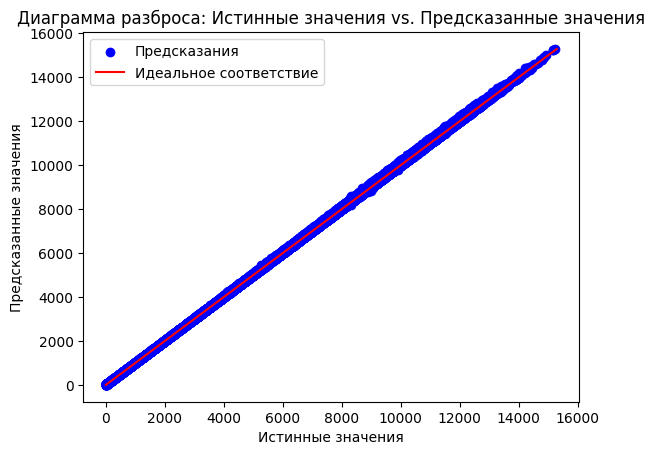

In [48]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [49]:
column_top_molar_flow_model.save('./models/amine_treatment_13_08/column_top_molar_flow_model.h5')

# Определение молярного расхода нижнего продукта

In [5]:
column_bot_molar_flow_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
    'rich_amine molar flow, kgmol/h'
]]

In [6]:
column_bot_molar_flow_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas molar flow, kgmol/h","feed_gas H2S molar flow, kgmol/h","feed_gas CO2 molar flow, kgmol/h","feed_gas Methane molar flow, kgmol/h","feed_gas Ethane molar flow, kgmol/h","feed_gas Propane molar flow, kgmol/h",...,"lean_amine mass flow, kg/h",lean_amine molecular weight,"lean_amine Mass density, kg/m3","lean_amine molar flow, kgmol/h","lean_amine H2S molar flow, kgmol/h","lean_amine CO2 molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas molar flow, kgmol/h","rich_amine molar flow, kgmol/h"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,...,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,5870.716712,116.240769,131.495260,4009.062337,575.943410,288.120820,...,361132.352397,32.744629,1040.235933,11541.804252,2.884096,33.501414,9999.846673,1505.572069,5657.648995,11754.871979
std,14.726834,86277.067509,2.254273,41.131813,3433.502523,102.808912,102.021061,2488.283871,500.307503,250.349018,...,196058.939546,6.566487,13.984821,6962.873087,2.095730,25.994329,6497.662992,981.655992,3340.435678,6998.373238
min,10.000000,1000.000000,17.630435,48.732168,33.338025,0.005353,0.207002,16.662736,0.000933,0.000202,...,15000.000000,18.043180,973.756588,299.356341,0.035062,0.325252,194.673346,0.006981,0.004180,306.622963
25%,22.000000,74990.500000,24.160098,85.483707,2916.163761,31.849751,49.448425,1929.630171,161.870547,80.995843,...,192367.500000,28.099839,1032.383569,5868.173579,1.269090,13.449371,4897.851465,661.819137,2782.531515,6063.613525
50%,35.000000,149553.500000,25.725828,100.138569,5814.068691,86.399253,105.853246,3841.024204,436.326591,218.194499,...,361664.500000,33.812730,1041.412657,11045.326239,2.429430,26.934611,9224.920955,1384.967497,5591.793562,11275.466605
75%,48.000000,224502.000000,27.293888,122.779305,8728.900707,176.810764,193.917310,5821.054095,880.027025,439.906736,...,530754.250000,37.526382,1050.665489,16263.162662,4.056679,47.760824,13765.564888,2259.367346,8428.333741,16512.420586
max,60.000000,300000.000000,33.967309,341.551374,16404.642557,598.000656,585.760027,15013.476119,2728.899406,1347.803534,...,700000.000000,56.744250,1070.914903,38549.039746,15.147930,190.433750,38445.322887,4640.158398,16132.965175,38544.083495


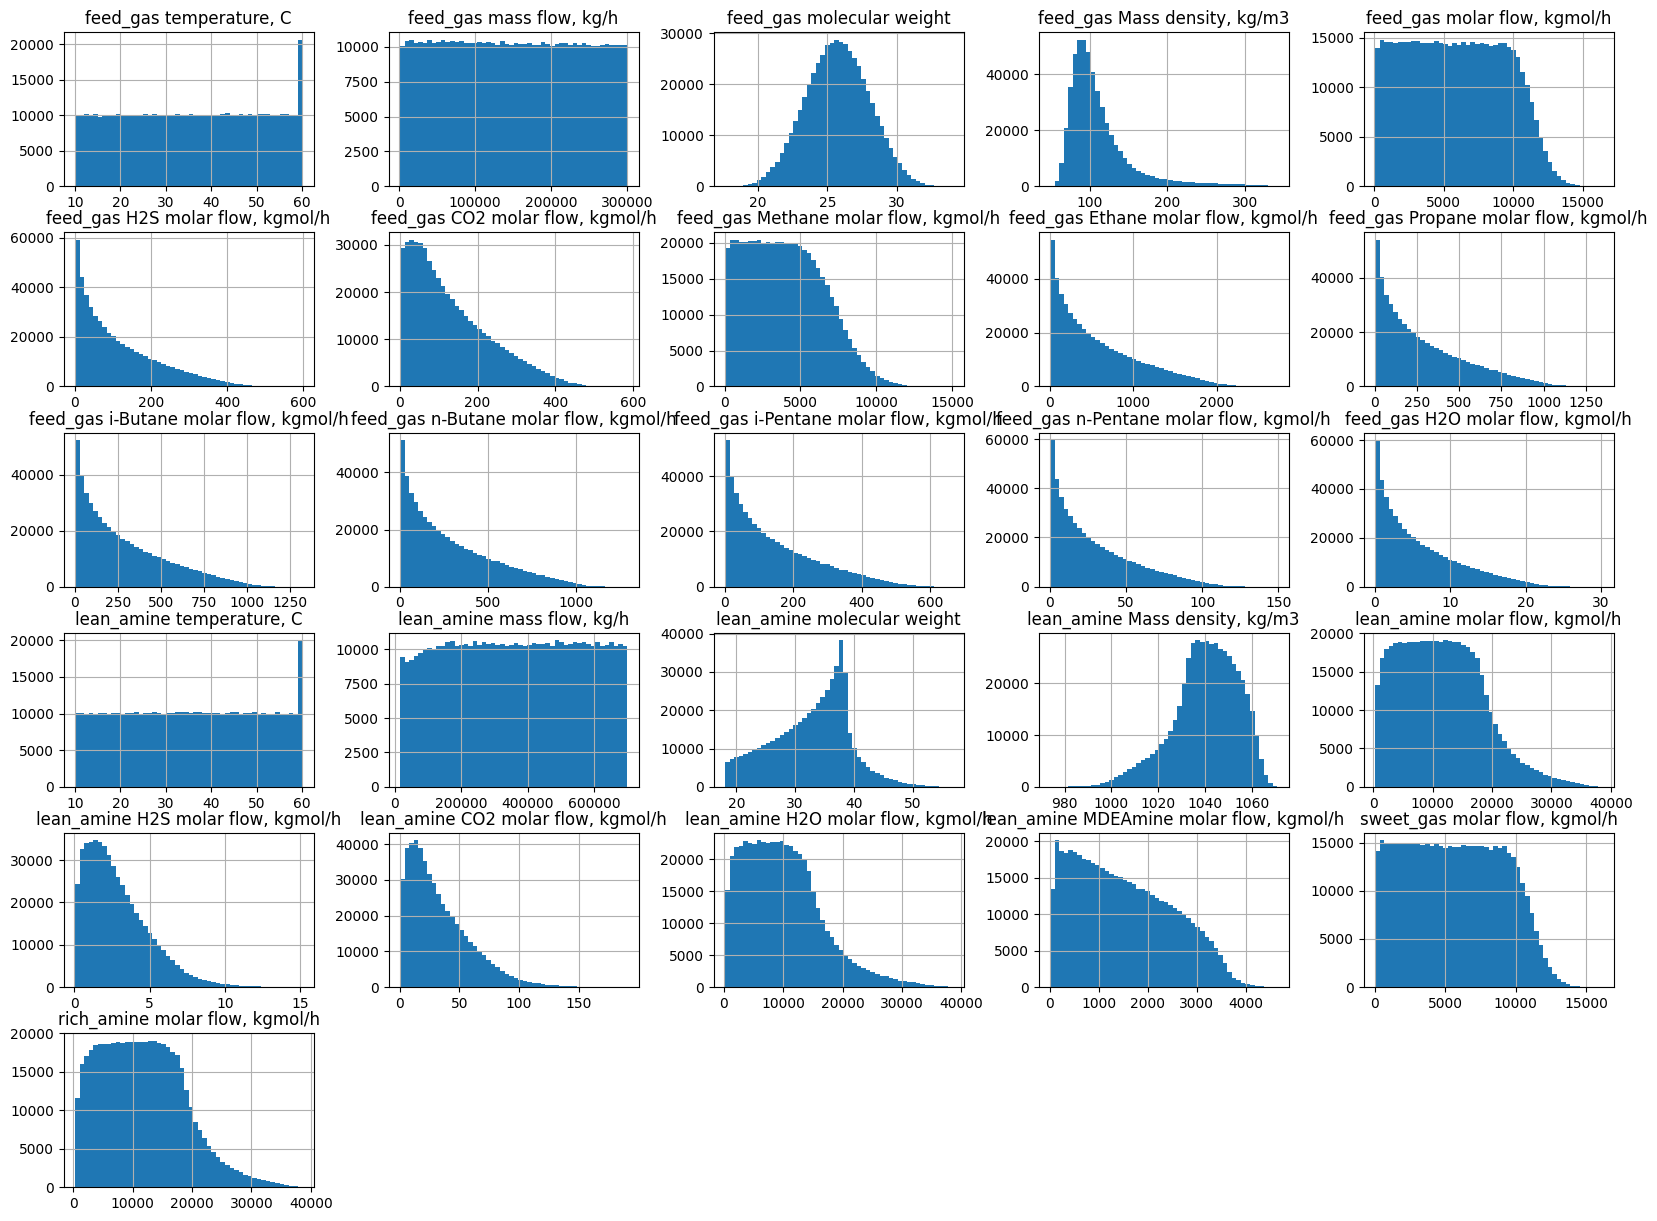

In [7]:
column_bot_molar_flow_data.hist(bins=50, figsize=(20, 15));

In [8]:
corr_matrix = column_bot_molar_flow_data.corr()

corr_matrix['rich_amine molar flow, kgmol/h'].sort_values(ascending=False)

rich_amine molar flow, kgmol/h             1.000000
lean_amine molar flow, kgmol/h             0.999807
lean_amine H2O molar flow, kgmol/h         0.990797
lean_amine mass flow, kg/h                 0.901333
lean_amine H2S molar flow, kgmol/h         0.830558
lean_amine CO2 molar flow, kgmol/h         0.777441
lean_amine MDEAmine molar flow, kgmol/h    0.511087
feed_gas H2S molar flow, kgmol/h           0.031731
feed_gas mass flow, kg/h                   0.025234
feed_gas molar flow, kgmol/h               0.024880
feed_gas Methane molar flow, kgmol/h       0.023064
feed_gas CO2 molar flow, kgmol/h           0.021477
feed_gas n-Pentane molar flow, kgmol/h     0.017481
feed_gas Ethane molar flow, kgmol/h        0.016986
feed_gas i-Butane molar flow, kgmol/h      0.015918
feed_gas Propane molar flow, kgmol/h       0.015721
feed_gas H2O molar flow, kgmol/h           0.015717
feed_gas n-Butane molar flow, kgmol/h      0.015525
feed_gas i-Pentane molar flow, kgmol/h     0.015266
sweet_gas mo

In [9]:
column_bot_molar_flow_data_mini = column_bot_molar_flow_data.sample(frac=0.5)

In [11]:
## Тестовая и обучающая выборки
X = column_bot_molar_flow_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
]]

y = column_bot_molar_flow_data_mini[[
    'rich_amine molar flow, kgmol/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_bot_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((205120, 25), (205120, 1))

In [12]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_0 = column_bot_molar_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 7s 1ms/step - loss: 894.4734 - mae: 894.4734
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 33.3708 - mae: 33.3708
Epoch 3/20
6410/6410 [==============================] - 7s 1ms/step - loss: 28.7359 - mae: 28.7359
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 27.0874 - mae: 27.0874
Epoch 5/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.9578 - mae: 25.9578
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.1207 - mae: 25.1207
Epoch 7/20
6410/6410 [==============================] - 7s 1ms/step - loss: 24.3140 - mae: 24.3140
Epoch 8/20
6410/6410 [==============================] - 7s 1ms/step - loss: 23.6331 - mae: 23.6331
Epoch 9/20
6410/6410 [==============================] - 7s 1ms/step - loss: 22.7179 - mae: 22.7179
Epoch 10/20
6410/6410 [==============================] - 8s 1ms/step - loss: 22.2906 - mae: 22.2906
Epoch 1

In [13]:
eval_0 = column_bot_molar_flow_model_0.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 998us/step - loss: 21.8514 - mae: 21.8514


In [14]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_1 = column_bot_molar_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 12s 2ms/step - loss: 690.0051 - mae: 690.0051
Epoch 2/20
6410/6410 [==============================] - 9s 1ms/step - loss: 33.7844 - mae: 33.7844
Epoch 3/20
6410/6410 [==============================] - 8s 1ms/step - loss: 29.0168 - mae: 29.0168
Epoch 4/20
6410/6410 [==============================] - 8s 1ms/step - loss: 27.0449 - mae: 27.0449
Epoch 5/20
6410/6410 [==============================] - 8s 1ms/step - loss: 26.1291 - mae: 26.1291
Epoch 6/20
6410/6410 [==============================] - 8s 1ms/step - loss: 25.3037 - mae: 25.3037
Epoch 7/20
6410/6410 [==============================] - 8s 1ms/step - loss: 24.2228 - mae: 24.2228
Epoch 8/20
6410/6410 [==============================] - 8s 1ms/step - loss: 23.9199 - mae: 23.9199
Epoch 9/20
6410/6410 [==============================] - 7s 1ms/step - loss: 23.2064 - mae: 23.2064
Epoch 10/20
6410/6410 [==============================] - 7s 1ms/step - loss: 22.8606 - mae: 22.8606
Epoch 

In [15]:
eval_1 = column_bot_molar_flow_model_1.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 981us/step - loss: 21.7832 - mae: 21.7832


In [16]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_2 = column_bot_molar_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 10s 1ms/step - loss: 347.2862 - mae: 347.2862
Epoch 2/20
6410/6410 [==============================] - 9s 1ms/step - loss: 51.1597 - mae: 51.1597
Epoch 3/20
6410/6410 [==============================] - 9s 1ms/step - loss: 45.6792 - mae: 45.6792
Epoch 4/20
6410/6410 [==============================] - 9s 1ms/step - loss: 43.1088 - mae: 43.1088
Epoch 5/20
6410/6410 [==============================] - 8s 1ms/step - loss: 42.1771 - mae: 42.1771
Epoch 6/20
6410/6410 [==============================] - 9s 1ms/step - loss: 43.3641 - mae: 43.3641
Epoch 7/20
6410/6410 [==============================] - 9s 1ms/step - loss: 42.2246 - mae: 42.2246
Epoch 8/20
6410/6410 [==============================] - 9s 1ms/step - loss: 40.9488 - mae: 40.9488
Epoch 9/20
6410/6410 [==============================] - 9s 1ms/step - loss: 42.9089 - mae: 42.9089
Epoch 10/20
6410/6410 [==============================] - 8s 1ms/step - loss: 40.5160 - mae: 40.5160
Epoch 

In [17]:
eval_2 = column_bot_molar_flow_model_2.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 837us/step - loss: 18.8691 - mae: 18.8691


In [18]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_3 = column_bot_molar_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 8s 1ms/step - loss: 1204.7213 - mae: 1204.7213
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 41.0796 - mae: 41.0796
Epoch 3/20
6410/6410 [==============================] - 7s 1ms/step - loss: 31.8716 - mae: 31.8716
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 27.5355 - mae: 27.5355
Epoch 5/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.5188 - mae: 25.5188
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 24.4607 - mae: 24.4607
Epoch 7/20
6410/6410 [==============================] - 6s 952us/step - loss: 23.4711 - mae: 23.4711
Epoch 8/20
6410/6410 [==============================] - 7s 1ms/step - loss: 22.8068 - mae: 22.8068
Epoch 9/20
6410/6410 [==============================] - 7s 1ms/step - loss: 22.2143 - mae: 22.2143
Epoch 10/20
6410/6410 [==============================] - 7s 1ms/step - loss: 21.7886 - mae: 21.7886
Epo

In [19]:
eval_3 = column_bot_molar_flow_model_3.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 836us/step - loss: 14.1112 - mae: 14.1112


In [20]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_4 = column_bot_molar_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 8s 1ms/step - loss: 413.3387 - mae: 413.3387
Epoch 2/20
6410/6410 [==============================] - 8s 1ms/step - loss: 42.7966 - mae: 42.7966
Epoch 3/20
6410/6410 [==============================] - 8s 1ms/step - loss: 38.9176 - mae: 38.9176
Epoch 4/20
6410/6410 [==============================] - 8s 1ms/step - loss: 36.8923 - mae: 36.8923
Epoch 5/20
6410/6410 [==============================] - 8s 1ms/step - loss: 35.5236 - mae: 35.5236
Epoch 6/20
6410/6410 [==============================] - 9s 1ms/step - loss: 35.5851 - mae: 35.5851
Epoch 7/20
6410/6410 [==============================] - 9s 1ms/step - loss: 34.4913 - mae: 34.4913
Epoch 8/20
6410/6410 [==============================] - 9s 1ms/step - loss: 34.2944 - mae: 34.2944
Epoch 9/20
6410/6410 [==============================] - 9s 1ms/step - loss: 32.9498 - mae: 32.9498
Epoch 10/20
6410/6410 [==============================] - 9s 1ms/step - loss: 33.3771 - mae: 33.3771
Epoch 1

In [21]:
eval_4 = column_bot_molar_flow_model_4.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 883us/step - loss: 13.4915 - mae: 13.4915


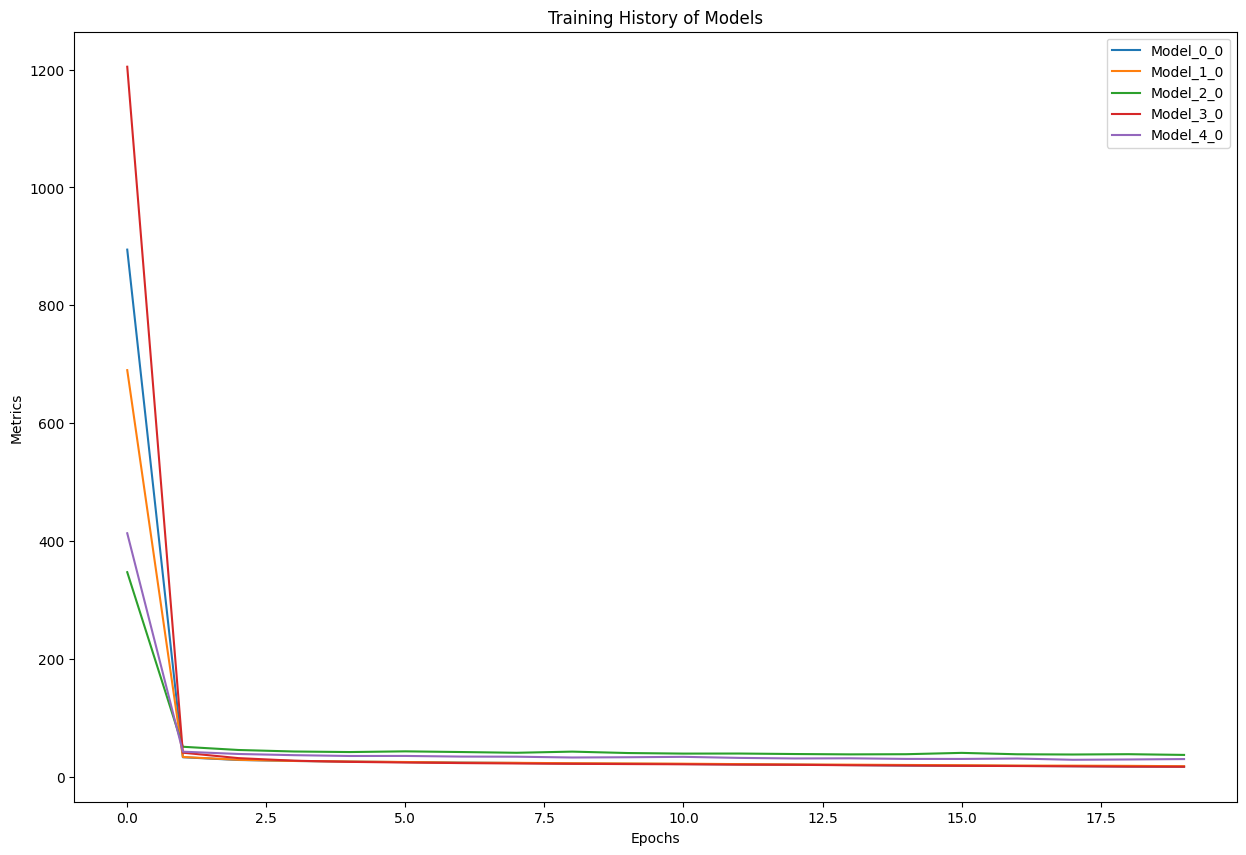

In [22]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(column_bot_molar_flow_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(column_bot_molar_flow_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(column_bot_molar_flow_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(column_bot_molar_flow_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(column_bot_molar_flow_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

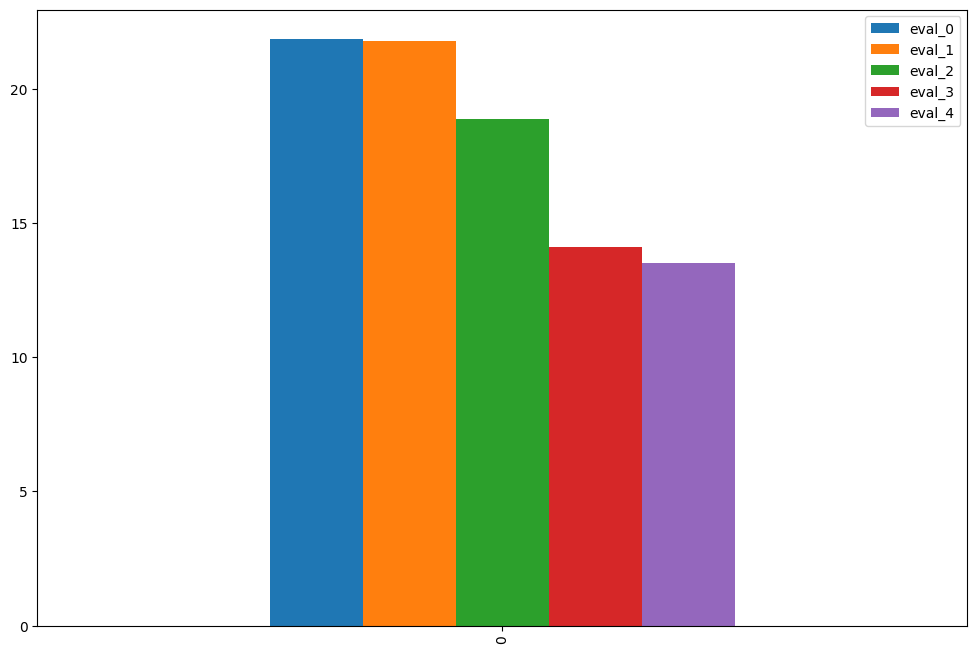

In [23]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения молярного расхода нижнего продукта колонны

In [24]:
## Тестовая и обучающая выборки
X = column_bot_molar_flow_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
]]

y = column_bot_molar_flow_data[[
    'rich_amine molar flow, kgmol/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_bot_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((410240, 25), (410240, 1))

In [25]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history = column_bot_molar_flow_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
12820/12820 [==============================] - 13s 979us/step - loss: 215.1456 - mae: 215.1456
Epoch 2/50
12820/12820 [==============================] - 14s 1ms/step - loss: 39.3955 - mae: 39.3955
Epoch 3/50
12820/12820 [==============================] - 14s 1ms/step - loss: 36.4388 - mae: 36.4388
Epoch 4/50
12820/12820 [==============================] - 16s 1ms/step - loss: 35.2656 - mae: 35.2656
Epoch 5/50
12820/12820 [==============================] - 16s 1ms/step - loss: 35.2315 - mae: 35.2315
Epoch 6/50
12820/12820 [==============================] - 16s 1ms/step - loss: 34.1853 - mae: 34.1853
Epoch 7/50
12820/12820 [==============================] - 15s 1ms/step - loss: 32.6899 - mae: 32.6899
Epoch 8/50
12820/12820 [==============================] - 16s 1ms/step - loss: 31.8230 - mae: 31.8230
Epoch 9/50
12820/12820 [==============================] - 16s 1ms/step - loss: 32.2389 - mae: 32.2389
Epoch 10/50
12820/12820 [==============================] - 15s 1ms/step - loss

In [26]:
column_bot_molar_flow_model.evaluate(X_test_normal, y_test)

3205/3205 [==============================] - 2s 685us/step - loss: 9.1977 - mae: 9.1977


[9.197735786437988, 9.197735786437988]

In [27]:
y_pred = column_bot_molar_flow_model.predict(X_test_normal)

3205/3205 [==============================] - 2s 649us/step


In [28]:
y_pred

array([[14219.203 ],
       [ 4903.7896],
       [13771.152 ],
       ...,
       [ 1504.9679],
       [10545.053 ],
       [20663.055 ]], dtype=float32)

In [29]:
y_test

,"rich_amine molar flow, kgmol/h"
337566,14218.461543
201781,4904.538730
215224,13786.843314
8834,7278.214033
394112,8092.792319
...,...
396710,8160.841837
447239,17236.142677
217230,1493.708531
397167,10549.402880


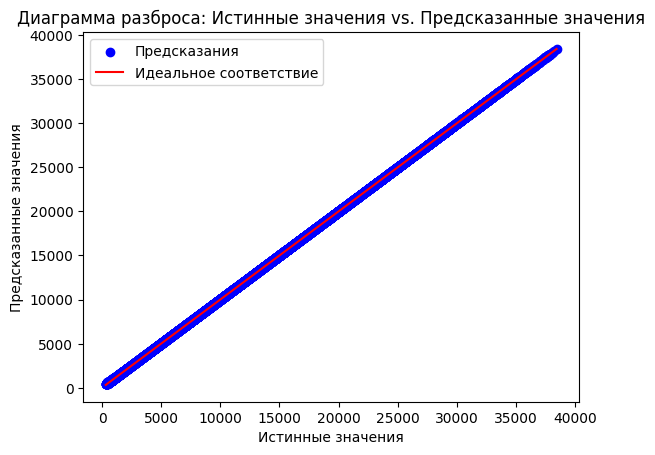

In [30]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [31]:
column_bot_molar_flow_model.save('./models/amine_treatment_13_08/column_bot_molar_flow_model.h5')

# Определение температуры верха колонны

In [75]:
column_top_temperature_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h',
    'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h', 'feed_gas Methane molar flow, kgmol/h',
    'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h', 'feed_gas i-Butane molar flow, kgmol/h',
    'feed_gas n-Butane molar flow, kgmol/h', 'feed_gas i-Pentane molar flow, kgmol/h',
    'feed_gas n-Pentane molar flow, kgmol/h',  'feed_gas H2O molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'sweet_gas molar flow, kgmol/h', 'rich_amine molar flow, kgmol/h',
    'sweet_gas temperature, C'
]]

In [76]:
column_top_temperature_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas molar flow, kgmol/h","feed_gas H2S molar flow, kgmol/h","feed_gas CO2 molar flow, kgmol/h","feed_gas Methane molar flow, kgmol/h","feed_gas Ethane molar flow, kgmol/h","feed_gas Propane molar flow, kgmol/h",...,lean_amine molecular weight,"lean_amine Mass density, kg/m3","lean_amine molar flow, kgmol/h","lean_amine H2S molar flow, kgmol/h","lean_amine CO2 molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas molar flow, kgmol/h","rich_amine molar flow, kgmol/h","sweet_gas temperature, C"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,...,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,5870.716712,116.240769,131.495260,4009.062337,575.943410,288.120820,...,32.744629,1040.235933,11541.804252,2.884096,33.501414,9999.846673,1505.572069,5657.648995,11754.871979,35.156846
std,14.726834,86277.067509,2.254273,41.131813,3433.502523,102.808912,102.021061,2488.283871,500.307503,250.349018,...,6.566487,13.984821,6962.873087,2.095730,25.994329,6497.662992,981.655992,3340.435678,6998.373238,20.660126
min,10.000000,1000.000000,17.630435,48.732168,33.338025,0.005353,0.207002,16.662736,0.000933,0.000202,...,18.043180,973.756588,299.356341,0.035062,0.325252,194.673346,0.006981,0.004180,306.622963,-86.001292
25%,22.000000,74990.500000,24.160098,85.483707,2916.163761,31.849751,49.448425,1929.630171,161.870547,80.995843,...,28.099839,1032.383569,5868.173579,1.269090,13.449371,4897.851465,661.819137,2782.531515,6063.613525,24.554853
50%,35.000000,149553.500000,25.725828,100.138569,5814.068691,86.399253,105.853246,3841.024204,436.326591,218.194499,...,33.812730,1041.412657,11045.326239,2.429430,26.934611,9224.920955,1384.967497,5591.793562,11275.466605,37.432344
75%,48.000000,224502.000000,27.293888,122.779305,8728.900707,176.810764,193.917310,5821.054095,880.027025,439.906736,...,37.526382,1050.665489,16263.162662,4.056679,47.760824,13765.564888,2259.367346,8428.333741,16512.420586,49.548660
max,60.000000,300000.000000,33.967309,341.551374,16404.642557,598.000656,585.760027,15013.476119,2728.899406,1347.803534,...,56.744250,1070.914903,38549.039746,15.147930,190.433750,38445.322887,4640.158398,16132.965175,38544.083495,82.882800


In [77]:
column_top_temperature_data['sweet_gas temperature, C'].describe()

count    512800.000000
mean         35.156846
std          20.660126
min         -86.001292
25%          24.554853
50%          37.432344
75%          49.548660
max          82.882800
Name: sweet_gas temperature, C, dtype: float64

In [78]:
column_top_temperature_data = column_top_temperature_data[column_top_temperature_data['sweet_gas temperature, C'] > 0]

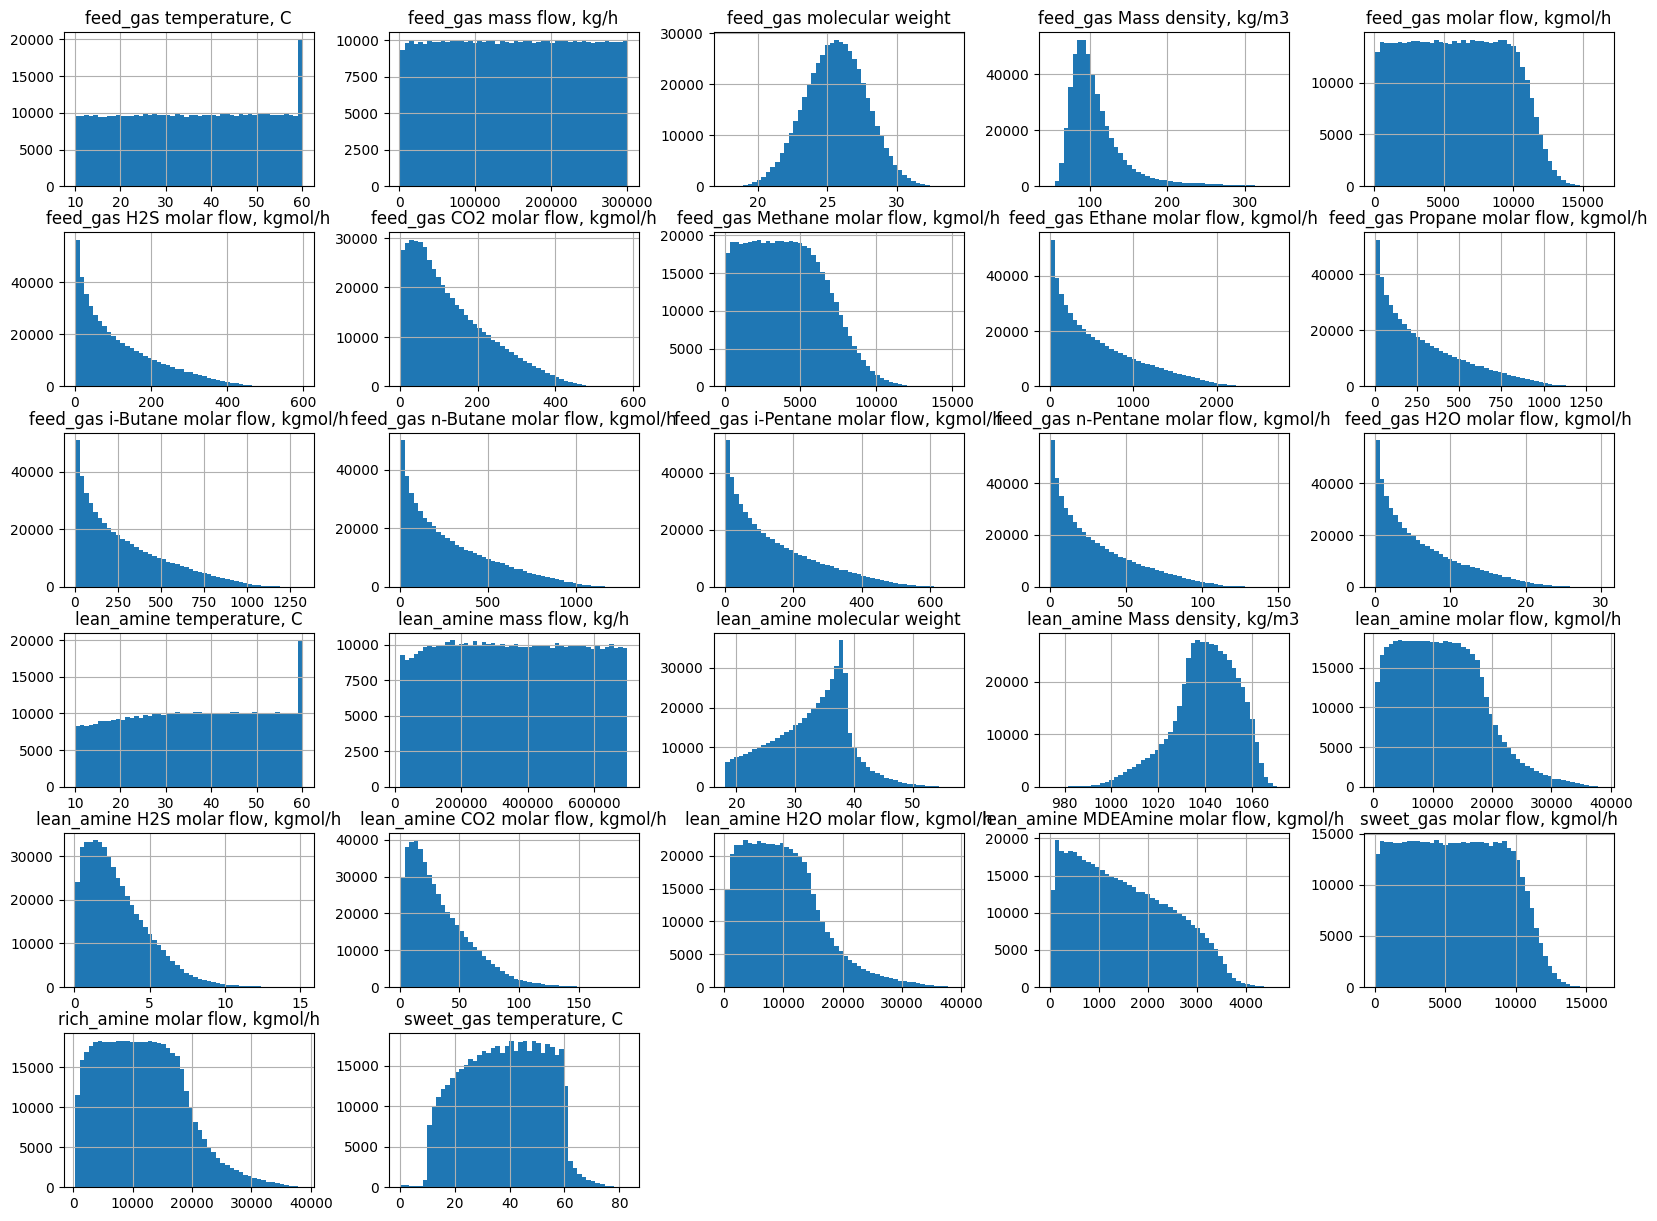

In [79]:
column_top_temperature_data.hist(bins=50, figsize=(20, 15));

In [80]:
corr_matrix = column_top_temperature_data.corr()

corr_matrix['sweet_gas temperature, C'].sort_values(ascending=False)

sweet_gas temperature, C                   1.000000
lean_amine temperature, C                  0.891885
feed_gas temperature, C                    0.099991
feed_gas H2S molar flow, kgmol/h           0.077581
feed_gas CO2 molar flow, kgmol/h           0.073746
feed_gas mass flow, kg/h                   0.070295
sweet_gas molar flow, kgmol/h              0.066115
feed_gas molar flow, kgmol/h               0.063341
feed_gas molecular weight                  0.057685
feed_gas n-Butane molar flow, kgmol/h      0.054851
feed_gas i-Butane molar flow, kgmol/h      0.052551
feed_gas Methane molar flow, kgmol/h       0.052261
feed_gas Ethane molar flow, kgmol/h        0.051542
feed_gas Propane molar flow, kgmol/h       0.050192
feed_gas i-Pentane molar flow, kgmol/h     0.045796
feed_gas n-Pentane molar flow, kgmol/h     0.043407
feed_gas H2O molar flow, kgmol/h           0.040544
lean_amine molecular weight                0.016749
feed_gas Mass density, kg/m3              -0.008895
lean_amine C

In [81]:
column_top_temperature_data_mini = column_top_temperature_data.sample(frac=0.5)

In [82]:
## Тестовая и обучающая выборки
X = column_top_temperature_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h',
    'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h', 'feed_gas Methane molar flow, kgmol/h',
    'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h', 'feed_gas i-Butane molar flow, kgmol/h',
    'feed_gas n-Butane molar flow, kgmol/h', 'feed_gas i-Pentane molar flow, kgmol/h',
    'feed_gas n-Pentane molar flow, kgmol/h',  'feed_gas H2O molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'sweet_gas molar flow, kgmol/h', 'rich_amine molar flow, kgmol/h',
]]

y = column_top_temperature_data_mini[[
    'sweet_gas temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h',
    'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h', 'feed_gas Methane molar flow, kgmol/h',
    'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h', 'feed_gas i-Butane molar flow, kgmol/h',
    'feed_gas n-Butane molar flow, kgmol/h', 'feed_gas i-Pentane molar flow, kgmol/h',
    'feed_gas n-Pentane molar flow, kgmol/h',  'feed_gas H2O molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'sweet_gas molar flow, kgmol/h', 'rich_amine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_temperature.pkl')

X_train_normal.shape, y_train.shape

((197808, 26), (197808, 1))

In [83]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temperature_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temperature_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temperature_history_0 = column_top_temperature_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6182/6182 [==============================] - 7s 1ms/step - loss: 2.6044 - mae: 2.6044
Epoch 2/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.1833 - mae: 1.1833
Epoch 3/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.1356 - mae: 1.1356
Epoch 4/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.1037 - mae: 1.1037
Epoch 5/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0801 - mae: 1.0801
Epoch 6/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0639 - mae: 1.0639
Epoch 7/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0466 - mae: 1.0466
Epoch 8/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0262 - mae: 1.0262
Epoch 9/20
6182/6182 [==============================] - 6s 1ms/step - loss: 1.0134 - mae: 1.0134
Epoch 10/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0055 - mae: 1.0055
Epoch 11/20
6182/6182 [======

In [84]:
eval_0 = column_top_temperature_model_0.evaluate(X_test_normal, y_test)

1546/1546 [==============================] - 2s 1ms/step - loss: 0.8830 - mae: 0.8830


In [85]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temperature_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temperature_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temperature_history_1 = column_top_temperature_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6182/6182 [==============================] - 8s 1ms/step - loss: 2.0706 - mae: 2.0706
Epoch 2/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.2335 - mae: 1.2335
Epoch 3/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.1761 - mae: 1.1761
Epoch 4/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.1038 - mae: 1.1038
Epoch 5/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0357 - mae: 1.0357
Epoch 6/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0026 - mae: 1.0026
Epoch 7/20
6182/6182 [==============================] - 7s 1ms/step - loss: 0.9775 - mae: 0.9775
Epoch 8/20
6182/6182 [==============================] - 7s 1ms/step - loss: 0.9553 - mae: 0.9553
Epoch 9/20
6182/6182 [==============================] - 7s 1ms/step - loss: 0.9424 - mae: 0.9424
Epoch 10/20
6182/6182 [==============================] - 7s 1ms/step - loss: 0.9300 - mae: 0.9300
Epoch 11/20
6182/6182 [======

In [86]:
eval_1 = column_top_temperature_model_1.evaluate(X_test_normal, y_test)

1546/1546 [==============================] - 2s 1ms/step - loss: 0.8025 - mae: 0.8025


In [87]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temperature_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temperature_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temperature_history_2 = column_top_temperature_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6182/6182 [==============================] - 9s 1ms/step - loss: 1.9306 - mae: 1.9306
Epoch 2/20
6182/6182 [==============================] - 7s 1ms/step - loss: 1.0990 - mae: 1.0990
Epoch 3/20
6182/6182 [==============================] - 8s 1ms/step - loss: 1.0430 - mae: 1.0430
Epoch 4/20
6182/6182 [==============================] - 8s 1ms/step - loss: 1.0136 - mae: 1.0136
Epoch 5/20
6182/6182 [==============================] - 8s 1ms/step - loss: 0.9879 - mae: 0.9879
Epoch 6/20
6182/6182 [==============================] - 8s 1ms/step - loss: 0.9634 - mae: 0.9634
Epoch 7/20
6182/6182 [==============================] - 9s 1ms/step - loss: 0.9446 - mae: 0.9446
Epoch 8/20
6182/6182 [==============================] - 8s 1ms/step - loss: 0.9343 - mae: 0.9343
Epoch 9/20
6182/6182 [==============================] - 8s 1ms/step - loss: 0.9196 - mae: 0.9196
Epoch 10/20
6182/6182 [==============================] - 8s 1ms/step - loss: 0.9044 - mae: 0.9044
Epoch 11/20
6182/6182 [======

In [88]:
eval_2 = column_top_temperature_model_2.evaluate(X_test_normal, y_test)

1546/1546 [==============================] - 1s 863us/step - loss: 0.8541 - mae: 0.8541


In [89]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temperature_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temperature_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temperature_history_3 = column_top_temperature_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6182/6182 [==============================] - 9s 1ms/step - loss: 1.7926 - mae: 1.7926
Epoch 2/20
6182/6182 [==============================] - 9s 1ms/step - loss: 1.1493 - mae: 1.1493
Epoch 3/20
6182/6182 [==============================] - 9s 1ms/step - loss: 1.0727 - mae: 1.0727
Epoch 4/20
6182/6182 [==============================] - 9s 1ms/step - loss: 1.0117 - mae: 1.0117
Epoch 5/20
6182/6182 [==============================] - 9s 1ms/step - loss: 0.9822 - mae: 0.9822
Epoch 6/20
6182/6182 [==============================] - 9s 1ms/step - loss: 0.9523 - mae: 0.9523
Epoch 7/20
6182/6182 [==============================] - 9s 1ms/step - loss: 0.9341 - mae: 0.9341
Epoch 8/20
6182/6182 [==============================] - 9s 1ms/step - loss: 0.9127 - mae: 0.9127
Epoch 9/20
6182/6182 [==============================] - 9s 1ms/step - loss: 0.9111 - mae: 0.9111
Epoch 10/20
6182/6182 [==============================] - 9s 1ms/step - loss: 0.8947 - mae: 0.8947
Epoch 11/20
6182/6182 [======

In [90]:
eval_3 = column_top_temperature_model_3.evaluate(X_test_normal, y_test)

1546/1546 [==============================] - 1s 802us/step - loss: 0.8886 - mae: 0.8886


In [91]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temperature_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temperature_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temperature_history_4 = column_top_temperature_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6182/6182 [==============================] - 10s 2ms/step - loss: 1.6313 - mae: 1.6313
Epoch 2/20
6182/6182 [==============================] - 10s 2ms/step - loss: 1.1108 - mae: 1.1108
Epoch 3/20
6182/6182 [==============================] - 9s 2ms/step - loss: 1.0247 - mae: 1.0247
Epoch 4/20
6182/6182 [==============================] - 11s 2ms/step - loss: 0.9824 - mae: 0.9824
Epoch 5/20
6182/6182 [==============================] - 9s 2ms/step - loss: 0.9481 - mae: 0.9481
Epoch 6/20
6182/6182 [==============================] - 10s 2ms/step - loss: 0.9210 - mae: 0.9210
Epoch 7/20
6182/6182 [==============================] - 11s 2ms/step - loss: 0.9158 - mae: 0.9158
Epoch 8/20
6182/6182 [==============================] - 11s 2ms/step - loss: 0.8927 - mae: 0.8927
Epoch 9/20
6182/6182 [==============================] - 10s 2ms/step - loss: 0.8790 - mae: 0.8790
Epoch 10/20
6182/6182 [==============================] - 10s 2ms/step - loss: 0.8711 - mae: 0.8711
Epoch 11/20
6182/6182

In [92]:
eval_4 = column_top_temperature_model_4.evaluate(X_test_normal, y_test)

1546/1546 [==============================] - 2s 915us/step - loss: 0.8285 - mae: 0.8285


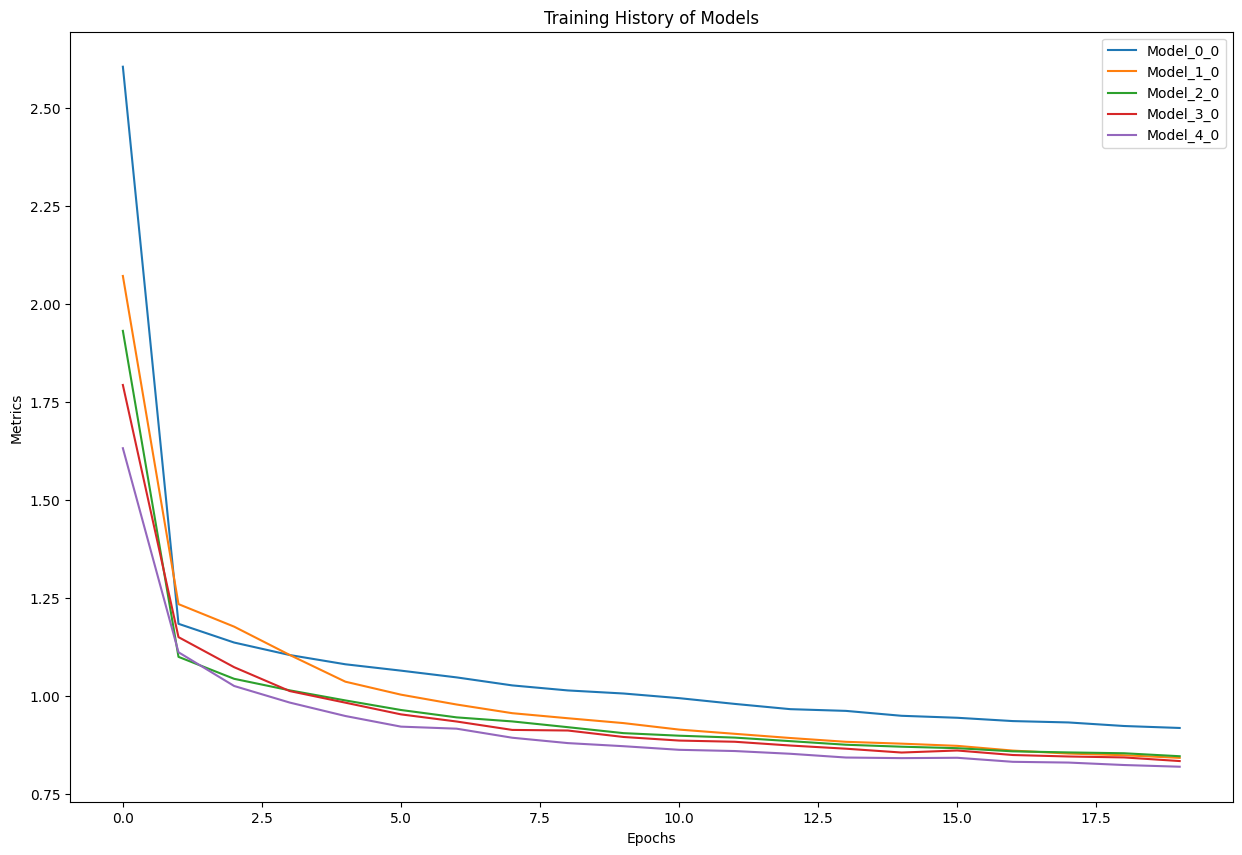

In [94]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(column_top_temperature_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(column_top_temperature_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(column_top_temperature_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(column_top_temperature_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(column_top_temperature_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

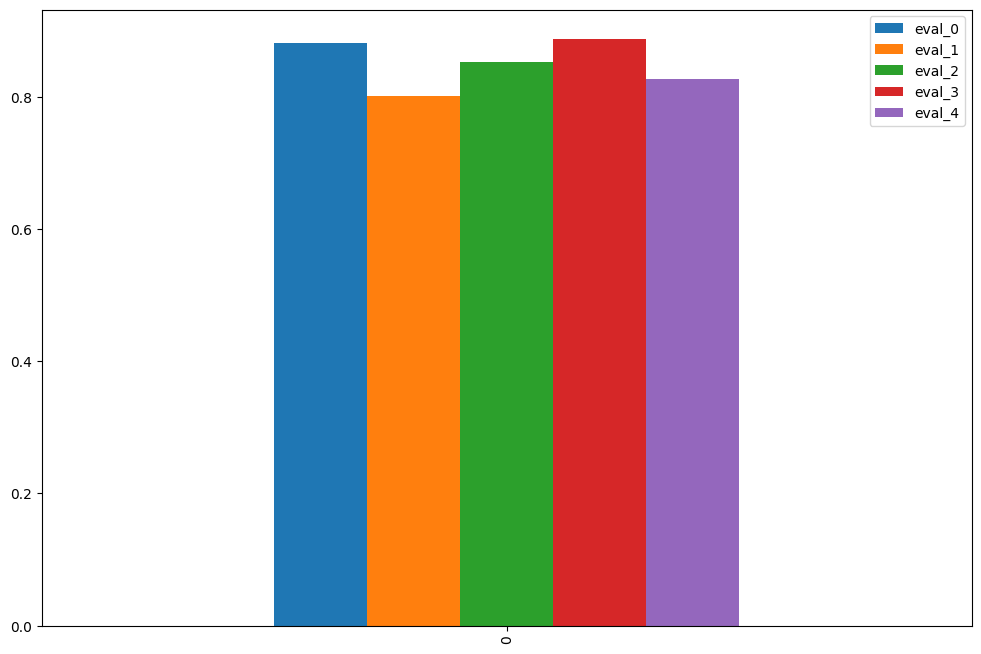

In [95]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения температуры верхнего продукта

In [150]:
## Тестовая и обучающая выборки
X = column_top_temperature_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h',
    'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h', 'feed_gas Methane molar flow, kgmol/h',
    'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h', 'feed_gas i-Butane molar flow, kgmol/h',
    'feed_gas n-Butane molar flow, kgmol/h', 'feed_gas i-Pentane molar flow, kgmol/h',
    'feed_gas n-Pentane molar flow, kgmol/h',  'feed_gas H2O molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'sweet_gas molar flow, kgmol/h', 'rich_amine molar flow, kgmol/h',
]]

y = column_top_temperature_data[[
    'sweet_gas temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h',
    'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h', 'feed_gas Methane molar flow, kgmol/h',
    'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h', 'feed_gas i-Butane molar flow, kgmol/h',
    'feed_gas n-Butane molar flow, kgmol/h', 'feed_gas i-Pentane molar flow, kgmol/h',
    'feed_gas n-Pentane molar flow, kgmol/h',  'feed_gas H2O molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'sweet_gas molar flow, kgmol/h', 'rich_amine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_temperature.pkl')

X_train_normal.shape, y_train.shape

((395617, 26), (395617, 1))

In [97]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temperature_model = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temperature_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temperature_history = column_top_temperature_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
12364/12364 [==============================] - 13s 999us/step - loss: 1.8025 - mae: 1.8025
Epoch 2/50
12364/12364 [==============================] - 14s 1ms/step - loss: 1.0708 - mae: 1.0708
Epoch 3/50
12364/12364 [==============================] - 13s 1ms/step - loss: 1.0216 - mae: 1.0216
Epoch 4/50
12364/12364 [==============================] - 14s 1ms/step - loss: 0.9852 - mae: 0.9852
Epoch 5/50
12364/12364 [==============================] - 15s 1ms/step - loss: 0.9569 - mae: 0.9569
Epoch 6/50
12364/12364 [==============================] - 13s 1ms/step - loss: 0.9303 - mae: 0.9303
Epoch 7/50
12364/12364 [==============================] - 14s 1ms/step - loss: 0.9077 - mae: 0.9077
Epoch 8/50
12364/12364 [==============================] - 14s 1ms/step - loss: 0.8951 - mae: 0.8951
Epoch 9/50
12364/12364 [==============================] - 13s 1ms/step - loss: 0.8819 - mae: 0.8819
Epoch 10/50
12364/12364 [==============================] - 14s 1ms/step - loss: 0.8674 - mae: 0.86

In [98]:
column_top_temperature_model.evaluate(X_test_normal, y_test)

3091/3091 [==============================] - 2s 773us/step - loss: 0.7365 - mae: 0.7365


[0.73652184009552, 0.73652184009552]

In [99]:
y_pred = column_top_temperature_model.predict(X_test_normal)

3091/3091 [==============================] - 2s 691us/step


In [131]:
x = 297
y_pred[x]

array([29.876425], dtype=float32)

In [132]:
y_test.iloc[x].values

array([30.27512158])

In [130]:
(100 - (y_test.iloc[x].values * 100) / y_pred[x])[0]

-0.7771022019662581

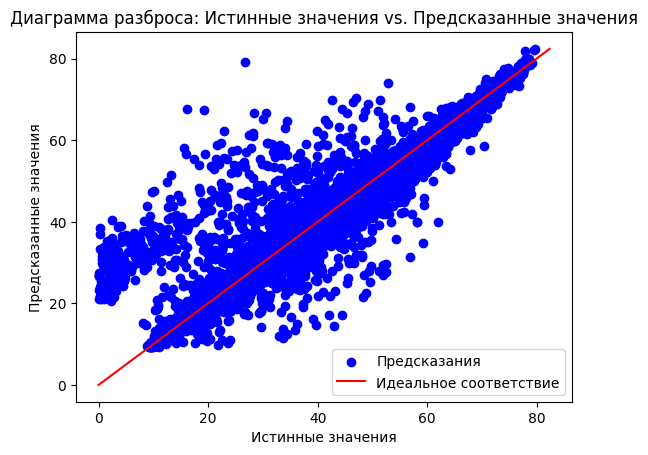

In [124]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [133]:
column_top_temperature_model.save('./models/amine_treatment_13_08/column_top_temperature.h5')

# Дополнительная модель для определения температуры верха колонны

In [135]:
column_top_temp_additional_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C'
]]

In [137]:
column_top_temp_additional_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,...,"lean_amine Methane molar flow, kgmol/h","lean_amine Ethane molar flow, kgmol/h","lean_amine Propane molar flow, kgmol/h","lean_amine i-Butane molar flow, kgmol/h","lean_amine n-Butane molar flow, kgmol/h","lean_amine i-Pentane molar flow, kgmol/h","lean_amine n-Pentane molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas temperature, C"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,...,512800.0,512800.0,512800.0,512800.0,512800.0,512800.0,512800.0,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,0.022507,0.676686,9.990383e-02,4.999104e-02,5.000758e-02,5.000281e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9999.846673,1505.572069,35.156846
std,14.726834,86277.067509,2.254273,41.131813,0.010107,0.079301,5.771310e-02,2.888328e-02,2.889126e-02,2.883384e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6497.662992,981.655992,20.660126
min,10.000000,1000.000000,17.630435,48.732168,0.005000,0.399159,1.653950e-07,2.931284e-07,8.852072e-08,7.172592e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.673346,0.006981,-86.001292
25%,22.000000,74990.500000,24.160098,85.483707,0.013747,0.619960,4.994783e-02,2.501646e-02,2.498077e-02,2.502512e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4897.851465,661.819137,24.554853
50%,35.000000,149553.500000,25.725828,100.138569,0.022486,0.676699,9.982294e-02,4.993723e-02,4.999459e-02,5.004510e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9224.920955,1384.967497,37.432344
75%,48.000000,224502.000000,27.293888,122.779305,0.031276,0.733327,1.498145e-01,7.500006e-02,7.504631e-02,7.493642e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13765.564888,2259.367346,49.548660
max,60.000000,300000.000000,33.967309,341.551374,0.040000,0.953623,2.000000e-01,9.999965e-02,9.999968e-02,9.999981e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38445.322887,4640.158398,82.882800


In [138]:
column_top_temp_additional_data['feed_gas temperature, C'].describe()

count    512800.000000
mean         35.069259
std          14.726834
min          10.000000
25%          22.000000
50%          35.000000
75%          48.000000
max          60.000000
Name: feed_gas temperature, C, dtype: float64

In [139]:
column_top_temp_additional_data['lean_amine temperature, C'].describe()

count    512800.000000
mean         34.992685
std          14.695711
min          10.000000
25%          22.000000
50%          35.000000
75%          48.000000
max          60.000000
Name: lean_amine temperature, C, dtype: float64

In [140]:
column_top_temp_additional_data['sweet_gas temperature, C'].describe()

count    512800.000000
mean         35.156846
std          20.660126
min         -86.001292
25%          24.554853
50%          37.432344
75%          49.548660
max          82.882800
Name: sweet_gas temperature, C, dtype: float64

In [143]:
column_top_temp_additional_data = column_top_temp_additional_data[column_top_temp_additional_data['sweet_gas temperature, C'] >= 10]

In [144]:
column_top_temp_additional_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,...,"lean_amine Methane molar flow, kgmol/h","lean_amine Ethane molar flow, kgmol/h","lean_amine Propane molar flow, kgmol/h","lean_amine i-Butane molar flow, kgmol/h","lean_amine n-Butane molar flow, kgmol/h","lean_amine i-Pentane molar flow, kgmol/h","lean_amine n-Pentane molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas temperature, C"
count,492542.000000,492542.000000,492542.000000,492542.000000,492542.000000,492542.000000,4.925420e+05,4.925420e+05,4.925420e+05,4.925420e+05,...,492542.0,492542.0,492542.0,492542.0,492542.0,492542.0,492542.0,492542.000000,492542.000000,492542.000000
mean,35.131187,150894.672136,25.591279,108.850172,0.022487,0.681117,9.834205e-02,4.931645e-02,4.912416e-02,4.906615e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9931.989358,1494.961459,38.001284
std,14.718907,86129.065687,2.174489,37.814639,0.010105,0.076960,5.753318e-02,2.881161e-02,2.876355e-02,2.868232e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6496.643550,980.951627,14.454514
min,10.000000,1000.000000,17.630435,48.732168,0.005000,0.407895,1.653950e-07,2.931284e-07,8.852072e-08,7.172592e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.673346,0.006981,10.000018
25%,22.000000,76353.000000,24.092030,84.958845,0.013726,0.626286,4.850548e-02,2.437484e-02,2.419412e-02,2.421915e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4815.872501,651.093204,26.211128
50%,35.000000,151004.000000,25.616699,98.982359,0.022460,0.680602,9.750788e-02,4.894534e-02,4.867331e-02,4.867977e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9135.989546,1369.071198,38.408125
75%,48.000000,225465.000000,27.103096,120.177975,0.031248,0.735787,1.476817e-01,7.412893e-02,7.382356e-02,7.362119e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13703.878824,2246.376390,50.096648
max,60.000000,300000.000000,33.967309,341.551374,0.040000,0.953623,2.000000e-01,9.999965e-02,9.999968e-02,9.999981e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38445.322887,4640.158398,82.882800


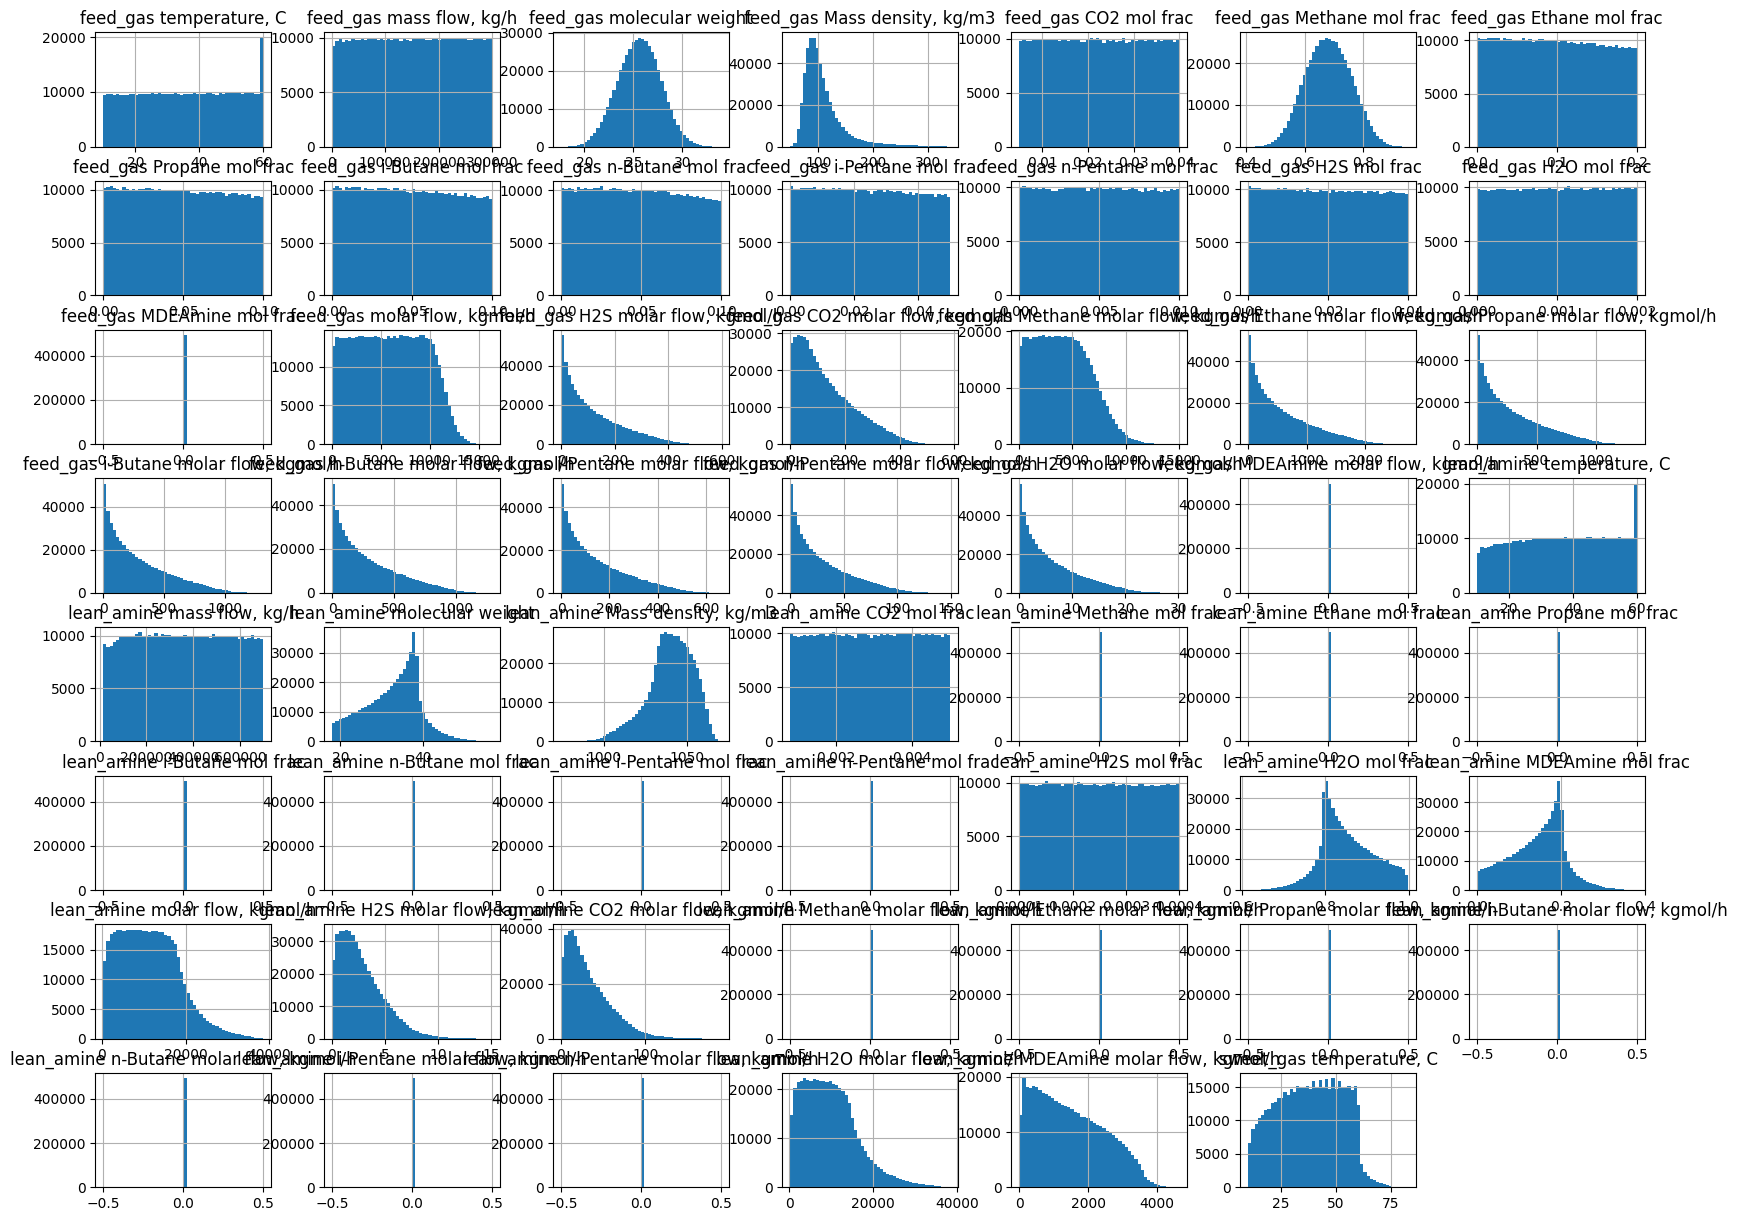

In [145]:
column_top_temp_additional_data.hist(bins=50, figsize=(20, 15));

In [146]:
corr_matrix = column_top_temp_additional_data.corr()

corr_matrix['sweet_gas temperature, C'].sort_values(ascending=False)

sweet_gas temperature, C                    1.000000
lean_amine temperature, C                   0.894032
feed_gas temperature, C                     0.100157
feed_gas H2S molar flow, kgmol/h            0.074954
feed_gas CO2 molar flow, kgmol/h            0.070609
feed_gas molecular weight                   0.067634
feed_gas mass flow, kg/h                    0.066949
feed_gas molar flow, kgmol/h                0.058706
feed_gas n-Butane molar flow, kgmol/h       0.054761
feed_gas i-Butane molar flow, kgmol/h       0.052408
feed_gas Ethane molar flow, kgmol/h         0.051248
feed_gas Propane molar flow, kgmol/h        0.049414
feed_gas Methane molar flow, kgmol/h        0.046337
feed_gas i-Pentane molar flow, kgmol/h      0.044715
feed_gas H2S mol frac                       0.042216
feed_gas n-Pentane molar flow, kgmol/h      0.040711
feed_gas H2O molar flow, kgmol/h            0.037604
feed_gas CO2 mol frac                       0.036581
feed_gas n-Butane mol frac                  0.

In [147]:
column_top_temp_additional_data_mini = column_top_temp_additional_data.sample(frac=0.5)

In [151]:
## Тестовая и обучающая выборки
X = column_top_temp_additional_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
]]

y = column_top_temp_additional_data_mini[[
    'sweet_gas temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_temperature_additional.pkl')

X_train_normal.shape, y_train.shape

((197016, 54), (197016, 1))

In [152]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temp_additional_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temp_additional_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temp_additional_0_history = column_top_temp_additional_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 7s 1ms/step - loss: 2.0993 - mae: 2.0993
Epoch 2/20
6157/6157 [==============================] - 7s 1ms/step - loss: 1.0656 - mae: 1.0656
Epoch 3/20
6157/6157 [==============================] - 7s 1ms/step - loss: 1.0028 - mae: 1.0028
Epoch 4/20
6157/6157 [==============================] - 7s 1ms/step - loss: 0.9593 - mae: 0.9593
Epoch 5/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.9270 - mae: 0.9270
Epoch 6/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8973 - mae: 0.8973
Epoch 7/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8754 - mae: 0.8754
Epoch 8/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8652 - mae: 0.8652
Epoch 9/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8463 - mae: 0.8463
Epoch 10/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8365 - mae: 0.8365
Epoch 11/20
6157/6157 [======

In [154]:
eval_0 = column_top_temp_additional_model_0.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 1s 782us/step - loss: 0.7636 - mae: 0.7636


In [155]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temp_additional_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temp_additional_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temp_additional_1_history = column_top_temp_additional_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 7s 1ms/step - loss: 2.0658 - mae: 2.0658
Epoch 2/20
6157/6157 [==============================] - 7s 1ms/step - loss: 1.0325 - mae: 1.0325
Epoch 3/20
6157/6157 [==============================] - 7s 1ms/step - loss: 0.9539 - mae: 0.9539
Epoch 4/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.9129 - mae: 0.9129
Epoch 5/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8862 - mae: 0.8862
Epoch 6/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8599 - mae: 0.8599
Epoch 7/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8475 - mae: 0.8475
Epoch 8/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8270 - mae: 0.8270
Epoch 9/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.8155 - mae: 0.8155
Epoch 10/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8046 - mae: 0.8046
Epoch 11/20
6157/6157 [======

In [156]:
eval_1 = column_top_temp_additional_model_1.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 1s 753us/step - loss: 0.8355 - mae: 0.8355


In [157]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temp_additional_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temp_additional_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temp_additional_2_history = column_top_temp_additional_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 7s 1ms/step - loss: 1.8975 - mae: 1.8975
Epoch 2/20
6157/6157 [==============================] - 7s 1ms/step - loss: 1.0504 - mae: 1.0504
Epoch 3/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.9800 - mae: 0.9800
Epoch 4/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.9462 - mae: 0.9462
Epoch 5/20
6157/6157 [==============================] - 7s 1ms/step - loss: 0.9182 - mae: 0.9182
Epoch 6/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8961 - mae: 0.8961
Epoch 7/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.8753 - mae: 0.8753
Epoch 8/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.8559 - mae: 0.8559
Epoch 9/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8505 - mae: 0.8505
Epoch 10/20
6157/6157 [==============================] - 8s 1ms/step - loss: 0.8350 - mae: 0.8350
Epoch 11/20
6157/6157 [=====

In [158]:
eval_2 = column_top_temp_additional_model_2.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 2s 921us/step - loss: 0.7435 - mae: 0.7435


In [159]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temp_additional_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temp_additional_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temp_additional_3_history = column_top_temp_additional_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 9s 1ms/step - loss: 1.9492 - mae: 1.9492
Epoch 2/20
6157/6157 [==============================] - 8s 1ms/step - loss: 1.1069 - mae: 1.1069
Epoch 3/20
6157/6157 [==============================] - 8s 1ms/step - loss: 1.0271 - mae: 1.0271
Epoch 4/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.9749 - mae: 0.9749
Epoch 5/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.9352 - mae: 0.9352
Epoch 6/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.9163 - mae: 0.9163
Epoch 7/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.8903 - mae: 0.8903
Epoch 8/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.8705 - mae: 0.8705
Epoch 9/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.8578 - mae: 0.8578
Epoch 10/20
6157/6157 [==============================] - 9s 1ms/step - loss: 0.8474 - mae: 0.8474
Epoch 11/20
6157/6157 [=====

In [160]:
eval_3 = column_top_temp_additional_model_3.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 2s 1ms/step - loss: 0.7261 - mae: 0.7261


In [161]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temp_additional_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temp_additional_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temp_additional_4_history = column_top_temp_additional_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 10s 2ms/step - loss: 1.7356 - mae: 1.7356
Epoch 2/20
6157/6157 [==============================] - 9s 1ms/step - loss: 1.1002 - mae: 1.1002
Epoch 3/20
6157/6157 [==============================] - 9s 1ms/step - loss: 1.0067 - mae: 1.0067
Epoch 4/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.9608 - mae: 0.9608
Epoch 5/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.9228 - mae: 0.9228
Epoch 6/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.8917 - mae: 0.8917
Epoch 7/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.8698 - mae: 0.8698
Epoch 8/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.8567 - mae: 0.8567
Epoch 9/20
6157/6157 [==============================] - 11s 2ms/step - loss: 0.8450 - mae: 0.8450
Epoch 10/20
6157/6157 [==============================] - 10s 2ms/step - loss: 0.8346 - mae: 0.8346
Epoch 11/20
6157/6157

In [162]:
eval_4 = column_top_temp_additional_model_4.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 2s 1ms/step - loss: 0.7340 - mae: 0.7340


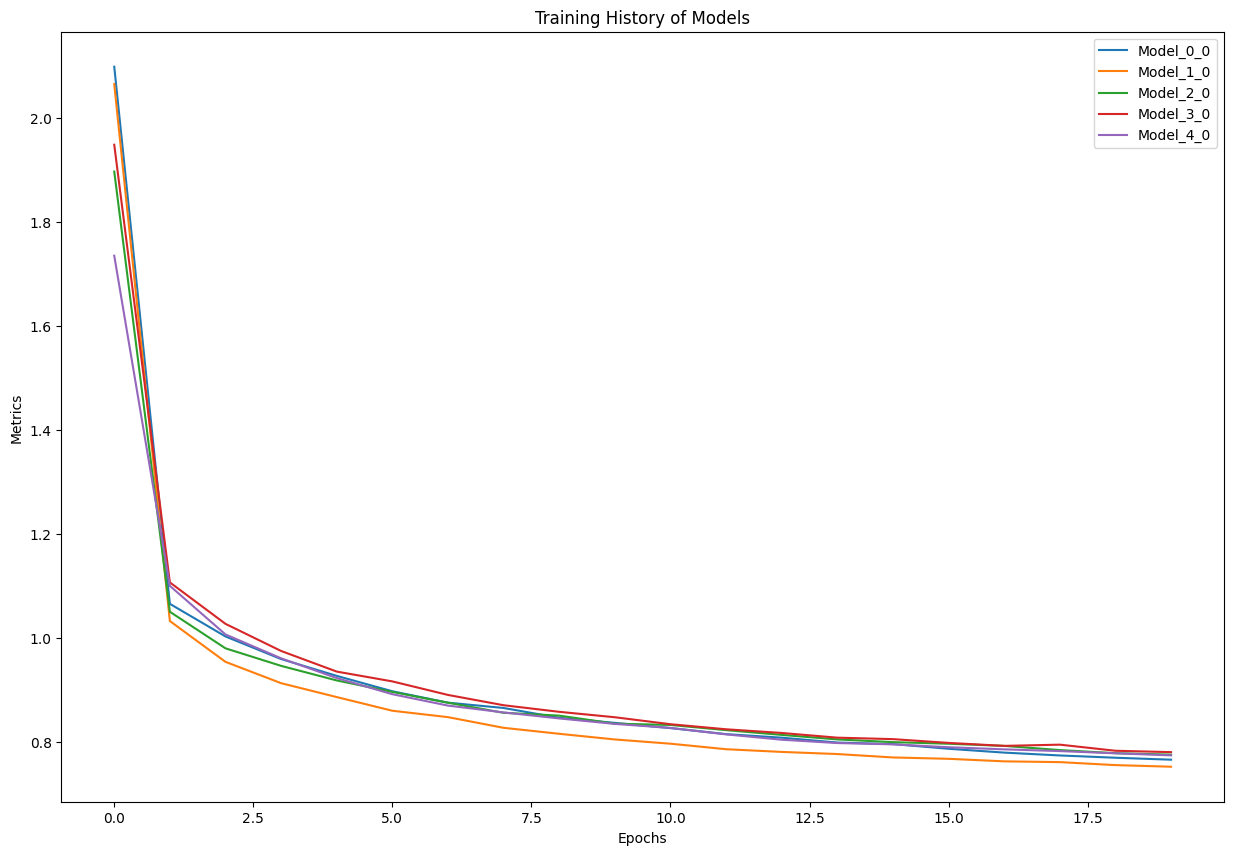

In [163]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(column_top_temp_additional_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(column_top_temp_additional_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(column_top_temp_additional_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(column_top_temp_additional_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(column_top_temp_additional_4_history.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

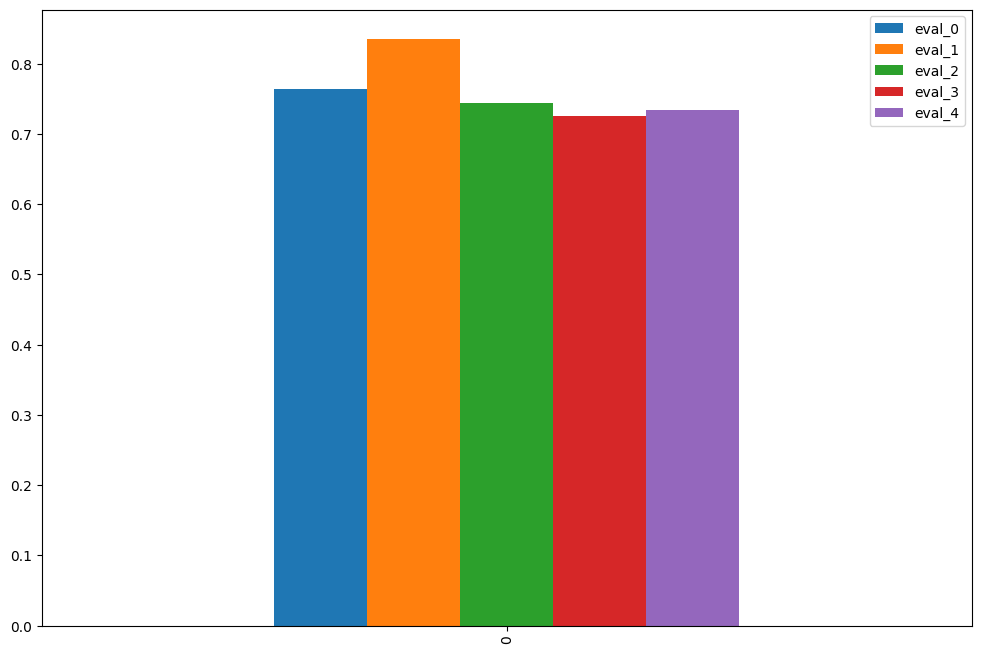

In [164]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для дополнительной модели определения температуры верха колонны

In [166]:
## Тестовая и обучающая выборки
X = column_top_temp_additional_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
]]

y = column_top_temp_additional_data[[
    'sweet_gas temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_temperature_additional.pkl')

X_train_normal.shape, y_train.shape

((394033, 54), (394033, 1))

In [167]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_temp_additional_model = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_temp_additional_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_temp_additional_history = column_top_temp_additional_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
12314/12314 [==============================] - 17s 1ms/step - loss: 1.4655 - mae: 1.4655
Epoch 2/50
12314/12314 [==============================] - 17s 1ms/step - loss: 0.9720 - mae: 0.9720
Epoch 3/50
12314/12314 [==============================] - 18s 1ms/step - loss: 0.9073 - mae: 0.9073
Epoch 4/50
12314/12314 [==============================] - 18s 1ms/step - loss: 0.8706 - mae: 0.8706
Epoch 5/50
12314/12314 [==============================] - 17s 1ms/step - loss: 0.8426 - mae: 0.8426
Epoch 6/50
12314/12314 [==============================] - 18s 1ms/step - loss: 0.8283 - mae: 0.8283
Epoch 7/50
12314/12314 [==============================] - 18s 1ms/step - loss: 0.8144 - mae: 0.8144
Epoch 8/50
12314/12314 [==============================] - 18s 1ms/step - loss: 0.7987 - mae: 0.7987
Epoch 9/50
12314/12314 [==============================] - 17s 1ms/step - loss: 0.7946 - mae: 0.7946
Epoch 10/50
12314/12314 [==============================] - 18s 1ms/step - loss: 0.7830 - mae: 0.7830

In [169]:
column_top_temp_additional_model.evaluate(X_test_normal, y_test)

3079/3079 [==============================] - 3s 803us/step - loss: 0.6964 - mae: 0.6964


[0.6963832974433899, 0.6963832974433899]

In [170]:
y_pred = column_top_temp_additional_model.predict(X_test_normal)

3079/3079 [==============================] - 2s 779us/step


In [171]:
y_pred

array([[27.982384],
       [56.535233],
       [50.25522 ],
       ...,
       [27.994709],
       [28.398138],
       [13.796486]], dtype=float32)

In [172]:
y_test

,"sweet_gas temperature, C"
471525,28.431181
311104,55.983494
13695,50.176908
36998,24.268522
197571,44.950385
...,...
237935,24.546484
414428,46.130476
44470,28.237213
177468,28.161326


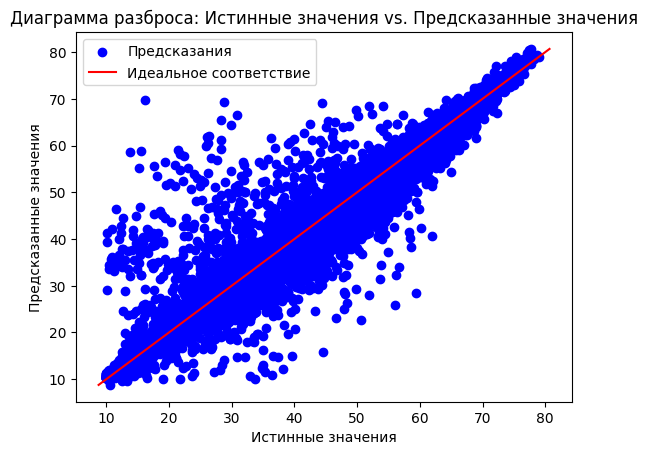

In [173]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [174]:
column_top_temp_additional_model.save('./models/amine_treatment_13_08/column_top_temp_additional_model.h5')

# Определение температуры низа колонны

In [6]:
column_bot_temp_data = data[[
        'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 'rich_amine temperature, C'
]]

In [7]:
column_bot_temp_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,...,"lean_amine Ethane molar flow, kgmol/h","lean_amine Propane molar flow, kgmol/h","lean_amine i-Butane molar flow, kgmol/h","lean_amine n-Butane molar flow, kgmol/h","lean_amine i-Pentane molar flow, kgmol/h","lean_amine n-Pentane molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas temperature, C","rich_amine temperature, C"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,...,512800.0,512800.0,512800.0,512800.0,512800.0,512800.0,512800.000000,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,0.022507,0.676686,9.990383e-02,4.999104e-02,5.000758e-02,5.000281e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,9999.846673,1505.572069,35.156846,41.264410
std,14.726834,86277.067509,2.254273,41.131813,0.010107,0.079301,5.771310e-02,2.888328e-02,2.889126e-02,2.883384e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,6497.662992,981.655992,20.660126,13.866044
min,10.000000,1000.000000,17.630435,48.732168,0.005000,0.399159,1.653950e-07,2.931284e-07,8.852072e-08,7.172592e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,194.673346,0.006981,-86.001292,-79.638506
25%,22.000000,74990.500000,24.160098,85.483707,0.013747,0.619960,4.994783e-02,2.501646e-02,2.498077e-02,2.502512e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,4897.851465,661.819137,24.554853,31.127567
50%,35.000000,149553.500000,25.725828,100.138569,0.022486,0.676699,9.982294e-02,4.993723e-02,4.999459e-02,5.004510e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,9224.920955,1384.967497,37.432344,41.884144
75%,48.000000,224502.000000,27.293888,122.779305,0.031276,0.733327,1.498145e-01,7.500006e-02,7.504631e-02,7.493642e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,13765.564888,2259.367346,49.548660,51.863685
max,60.000000,300000.000000,33.967309,341.551374,0.040000,0.953623,2.000000e-01,9.999965e-02,9.999968e-02,9.999981e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,38445.322887,4640.158398,82.882800,81.010935


In [8]:
column_bot_temp_data = column_bot_temp_data[column_bot_temp_data['sweet_gas temperature, C'] >= 10]

In [9]:
column_bot_temp_data = column_bot_temp_data[column_bot_temp_data['rich_amine temperature, C'] >= 10]

In [10]:
column_bot_temp_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,...,"lean_amine Ethane molar flow, kgmol/h","lean_amine Propane molar flow, kgmol/h","lean_amine i-Butane molar flow, kgmol/h","lean_amine n-Butane molar flow, kgmol/h","lean_amine i-Pentane molar flow, kgmol/h","lean_amine n-Pentane molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas temperature, C","rich_amine temperature, C"
count,491160.00000,491160.000000,491160.000000,491160.000000,491160.000000,491160.000000,4.911600e+05,4.911600e+05,4.911600e+05,4.911600e+05,...,491160.0,491160.0,491160.0,491160.0,491160.0,491160.0,491160.000000,491160.000000,491160.000000,491160.000000
mean,35.18972,150747.631831,25.582648,108.462023,0.022484,0.681396,9.824375e-02,4.927455e-02,4.906892e-02,4.900759e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,9949.973374,1498.019188,38.028421,41.966099
std,14.69483,86123.871215,2.168870,37.007653,0.010105,0.076794,5.751712e-02,2.880823e-02,2.875443e-02,2.867093e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,6493.799840,980.196732,14.455581,13.246072
min,10.00000,1000.000000,17.630435,48.732168,0.005000,0.407895,1.653950e-07,2.931284e-07,8.852072e-08,7.172592e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,194.673346,0.006981,10.000018,10.000808
25%,23.00000,76212.000000,24.088308,84.920454,0.013723,0.626679,4.841218e-02,2.433143e-02,2.414306e-02,2.418088e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,4842.934141,655.360211,26.235527,31.994062
50%,35.00000,150791.000000,25.611087,98.900282,0.022455,0.680831,9.735107e-02,4.888200e-02,4.859510e-02,4.859557e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,9156.197895,1372.989585,38.449218,42.511807
75%,48.00000,225308.000000,27.092025,119.930302,0.031246,0.735936,1.475365e-01,7.407225e-02,7.374363e-02,7.353733e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,13716.461910,2248.735063,50.122856,52.240121
max,60.00000,300000.000000,33.967309,341.551374,0.040000,0.953623,1.999997e-01,9.999965e-02,9.999968e-02,9.999981e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,38445.322887,4640.158398,82.882800,81.010935


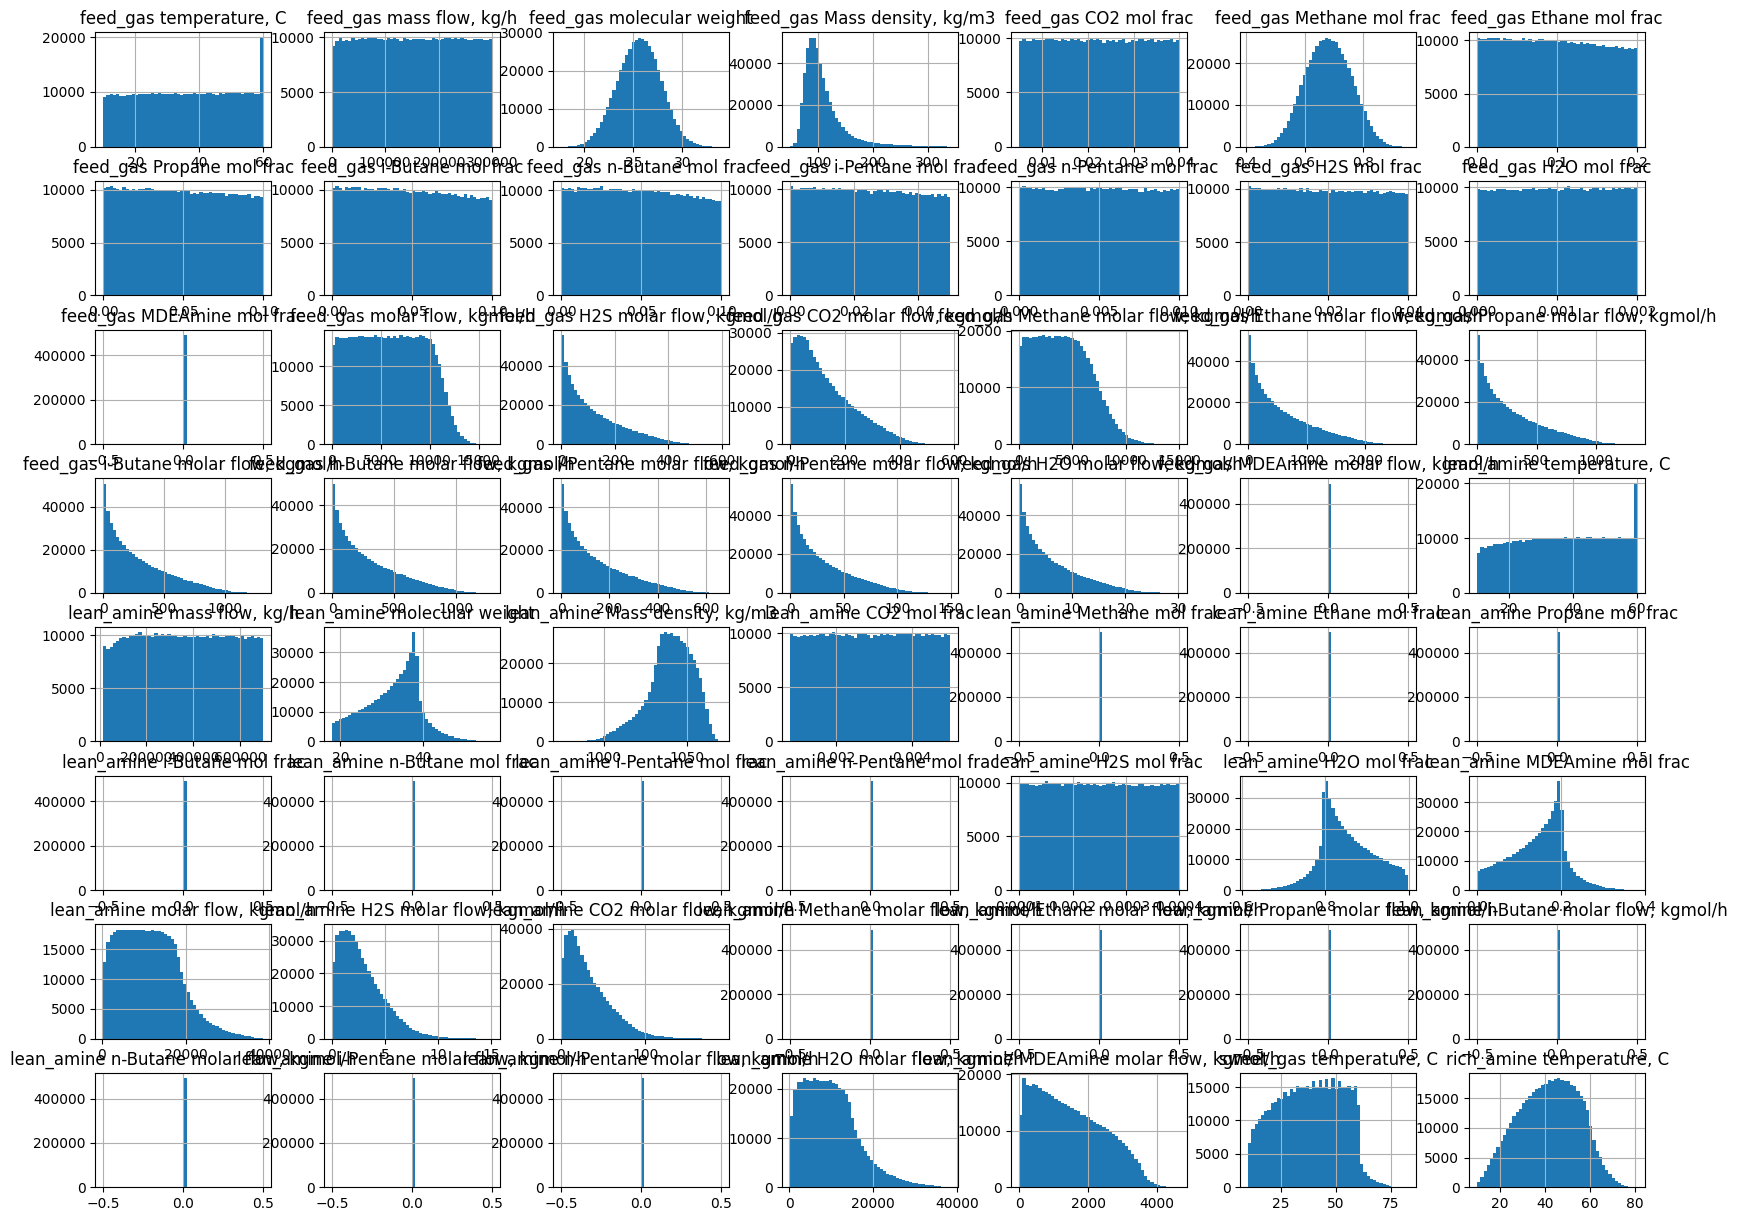

In [11]:
column_bot_temp_data.hist(bins=50, figsize=(20, 15));

In [12]:
corr_matrix = column_bot_temp_data.corr()

corr_matrix['rich_amine temperature, C'].sort_values(ascending=False)

rich_amine temperature, C                   1.000000
sweet_gas temperature, C                    0.647424
lean_amine temperature, C                   0.539231
feed_gas temperature, C                     0.534893
feed_gas H2S molar flow, kgmol/h            0.211116
feed_gas H2S mol frac                       0.163387
feed_gas CO2 molar flow, kgmol/h            0.151555
feed_gas mass flow, kg/h                    0.122412
feed_gas molar flow, kgmol/h                0.122204
feed_gas Methane molar flow, kgmol/h        0.114505
feed_gas CO2 mol frac                       0.091472
feed_gas H2O molar flow, kgmol/h            0.084133
feed_gas n-Pentane molar flow, kgmol/h      0.080362
lean_amine MDEAmine mol frac                0.080145
lean_amine molecular weight                 0.080127
feed_gas Propane molar flow, kgmol/h        0.071412
feed_gas Ethane molar flow, kgmol/h         0.070481
feed_gas i-Pentane molar flow, kgmol/h      0.069238
feed_gas i-Butane molar flow, kgmol/h       0.

In [13]:
column_bot_temp_data_mini = column_bot_temp_data.sample(frac=0.5)

In [14]:
## Тестовая и обучающая выборки
X = column_bot_temp_data_mini[[
        'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 
]]

y = column_bot_temp_data_mini[[
    'rich_amine temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
        'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_bot_temperature.pkl')

X_train_normal.shape, y_train.shape

((196464, 55), (196464, 1))

In [15]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_temp_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_temp_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_temp_model_history_0 = column_bot_temp_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 8s 1ms/step - loss: 3.0008 - mae: 3.0008
Epoch 2/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.7409 - mae: 1.7409
Epoch 3/20
6140/6140 [==============================] - 10s 2ms/step - loss: 1.6015 - mae: 1.6015
Epoch 4/20
6140/6140 [==============================] - 11s 2ms/step - loss: 1.5295 - mae: 1.5295
Epoch 5/20
6140/6140 [==============================] - 11s 2ms/step - loss: 1.4682 - mae: 1.4682
Epoch 6/20
6140/6140 [==============================] - 10s 2ms/step - loss: 1.4158 - mae: 1.4158
Epoch 7/20
6140/6140 [==============================] - 11s 2ms/step - loss: 1.3844 - mae: 1.3844
Epoch 8/20
6140/6140 [==============================] - 10s 2ms/step - loss: 1.3666 - mae: 1.3666
Epoch 9/20
6140/6140 [==============================] - 11s 2ms/step - loss: 1.3460 - mae: 1.3460
Epoch 10/20
6140/6140 [==============================] - 10s 2ms/step - loss: 1.3339 - mae: 1.3339
Epoch 11/20
6140/6140

In [16]:
eval_0 = column_bot_temp_model_0.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 1s 710us/step - loss: 1.2016 - mae: 1.2016


In [17]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_temp_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_temp_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_temp_model_history_1 = column_bot_temp_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 8s 1ms/step - loss: 2.7215 - mae: 2.7215
Epoch 2/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.6927 - mae: 1.6927
Epoch 3/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.5048 - mae: 1.5048
Epoch 4/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.4210 - mae: 1.4210
Epoch 5/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.3706 - mae: 1.3706
Epoch 6/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.3317 - mae: 1.3317
Epoch 7/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.3124 - mae: 1.3124
Epoch 8/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.2984 - mae: 1.2984
Epoch 9/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.2817 - mae: 1.2817
Epoch 10/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.2721 - mae: 1.2721
Epoch 11/20
6140/6140 [======

In [19]:
eval_1 = column_bot_temp_model_1.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 1s 767us/step - loss: 1.1597 - mae: 1.1597


In [18]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_temp_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_temp_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_temp_model_history_2 = column_bot_temp_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 7s 1ms/step - loss: 2.5704 - mae: 2.5704
Epoch 2/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.5662 - mae: 1.5662
Epoch 3/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.4583 - mae: 1.4583
Epoch 4/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.3954 - mae: 1.3954
Epoch 5/20
6140/6140 [==============================] - 9s 2ms/step - loss: 1.3578 - mae: 1.3578
Epoch 6/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.3262 - mae: 1.3262
Epoch 7/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.3018 - mae: 1.3018
Epoch 8/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.2823 - mae: 1.2823
Epoch 9/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.2738 - mae: 1.2738
Epoch 10/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.2538 - mae: 1.2538
Epoch 11/20
6140/6140 [======

In [20]:
eval_2 = column_bot_temp_model_2.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 1s 903us/step - loss: 1.1578 - mae: 1.1578


In [21]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_temp_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_temp_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_temp_model_history_3 = column_bot_temp_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 8s 1ms/step - loss: 2.5066 - mae: 2.5066
Epoch 2/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.6238 - mae: 1.6238
Epoch 3/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.5030 - mae: 1.5030
Epoch 4/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.4381 - mae: 1.4381
Epoch 5/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.3921 - mae: 1.3921
Epoch 6/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.3618 - mae: 1.3618
Epoch 7/20
6140/6140 [==============================] - 9s 2ms/step - loss: 1.3367 - mae: 1.3367
Epoch 8/20
6140/6140 [==============================] - 10s 2ms/step - loss: 1.3132 - mae: 1.3132
Epoch 9/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.3048 - mae: 1.3048
Epoch 10/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.2803 - mae: 1.2803
Epoch 11/20
6140/6140 [=====

In [22]:
eval_3 = column_bot_temp_model_3.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 1s 760us/step - loss: 1.1906 - mae: 1.1906


In [23]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_temp_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_temp_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_temp_model_history_4 = column_bot_temp_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 8s 1ms/step - loss: 2.3893 - mae: 2.3893
Epoch 2/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.5505 - mae: 1.5505
Epoch 3/20
6140/6140 [==============================] - 7s 1ms/step - loss: 1.4346 - mae: 1.4346
Epoch 4/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.3933 - mae: 1.3933
Epoch 5/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.3566 - mae: 1.3566
Epoch 6/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.3303 - mae: 1.3303
Epoch 7/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.3116 - mae: 1.3116
Epoch 8/20
6140/6140 [==============================] - 8s 1ms/step - loss: 1.2932 - mae: 1.2932
Epoch 9/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.2796 - mae: 1.2796
Epoch 10/20
6140/6140 [==============================] - 9s 1ms/step - loss: 1.2629 - mae: 1.2629
Epoch 11/20
6140/6140 [======

In [24]:
eval_4 = column_bot_temp_model_4.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 2s 944us/step - loss: 1.2526 - mae: 1.2526


In [25]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_temp_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_temp_model_5.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_temp_model_history_5 = column_bot_temp_model_5.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 13s 2ms/step - loss: 2.3892 - mae: 2.3892
Epoch 2/20
6140/6140 [==============================] - 13s 2ms/step - loss: 1.5918 - mae: 1.5918
Epoch 3/20
6140/6140 [==============================] - 14s 2ms/step - loss: 1.4753 - mae: 1.4753
Epoch 4/20
6140/6140 [==============================] - 13s 2ms/step - loss: 1.4232 - mae: 1.4232
Epoch 5/20
6140/6140 [==============================] - 13s 2ms/step - loss: 1.3814 - mae: 1.3814
Epoch 6/20
6140/6140 [==============================] - 14s 2ms/step - loss: 1.3440 - mae: 1.3440
Epoch 7/20
6140/6140 [==============================] - 12s 2ms/step - loss: 1.3242 - mae: 1.3242
Epoch 8/20
6140/6140 [==============================] - 13s 2ms/step - loss: 1.3030 - mae: 1.3030
Epoch 9/20
6140/6140 [==============================] - 14s 2ms/step - loss: 1.2999 - mae: 1.2999
Epoch 10/20
6140/6140 [==============================] - 13s 2ms/step - loss: 1.2730 - mae: 1.2730
Epoch 11/20
6140/61

In [26]:
eval_5 = column_bot_temp_model_5.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 2s 934us/step - loss: 1.1581 - mae: 1.1581


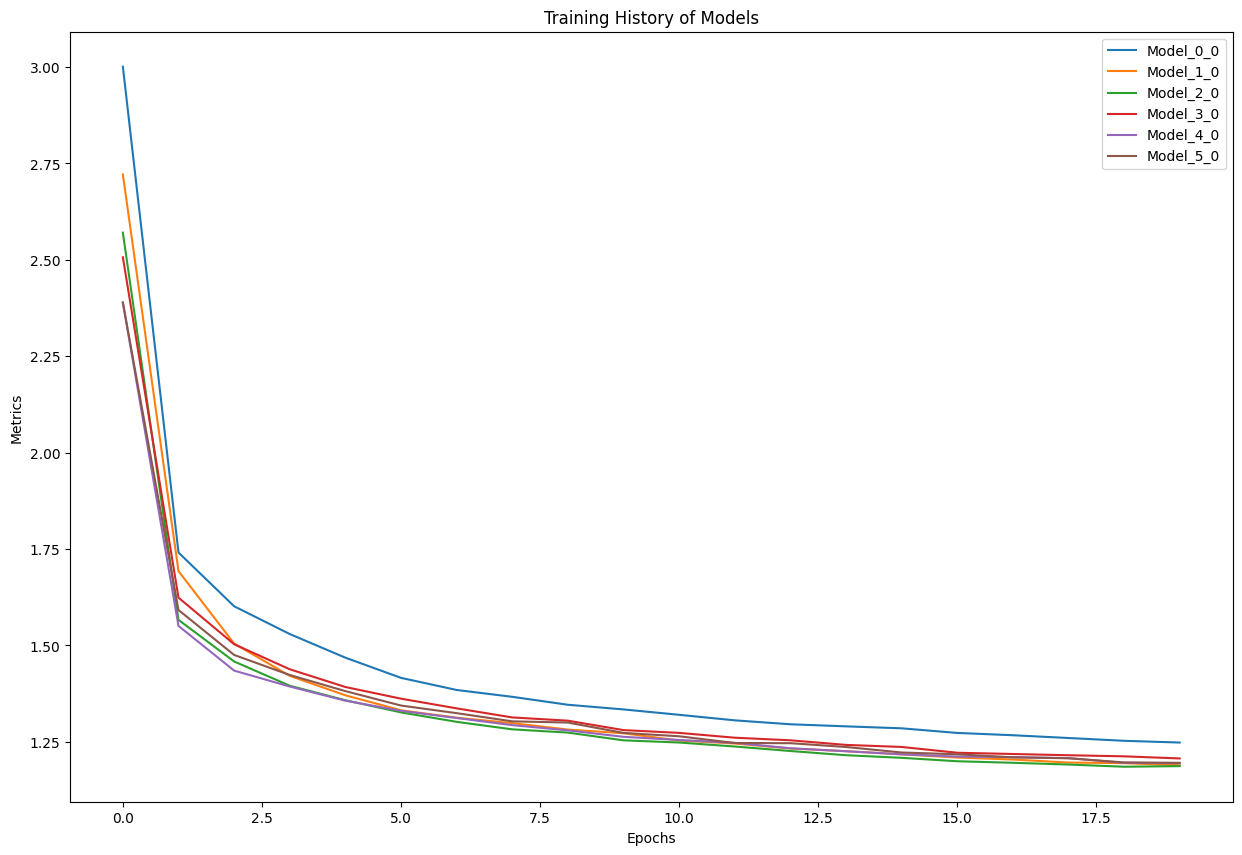

In [27]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(column_bot_temp_model_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(column_bot_temp_model_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(column_bot_temp_model_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(column_bot_temp_model_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(column_bot_temp_model_history_4.history['loss']).add_prefix('Model_4_')
history_5_df = pd.DataFrame(column_bot_temp_model_history_5.history['loss']).add_prefix('Model_5_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df, history_5_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

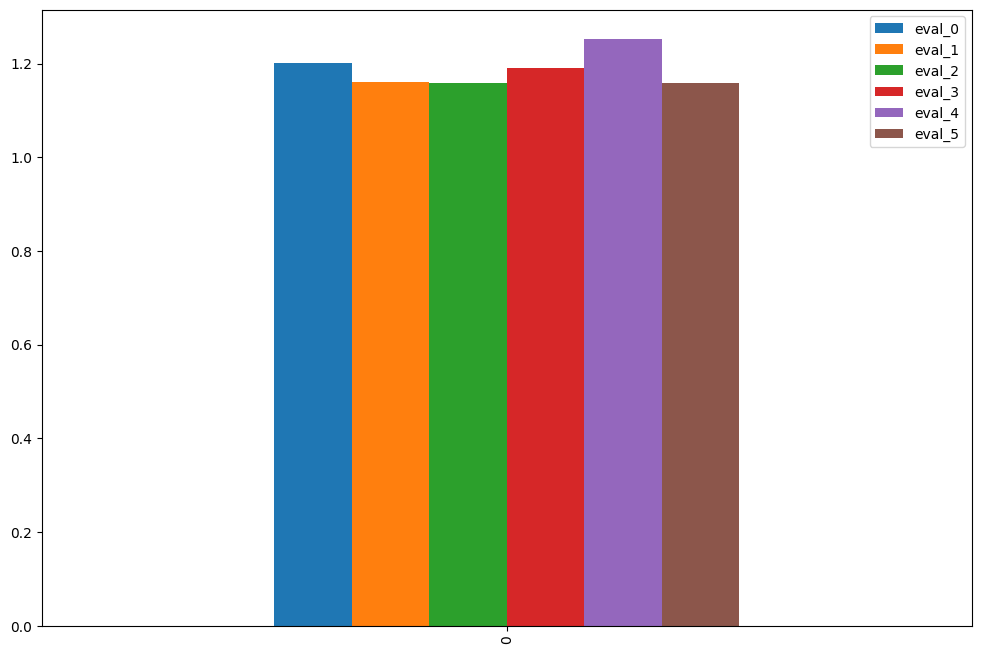

In [28]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
    'eval_5': eval_5[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения температуры низа колонны

In [29]:
## Тестовая и обучающая выборки
X = column_bot_temp_data[[
        'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 
]]

y = column_bot_temp_data[[
    'rich_amine temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
        'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_bot_temperature.pkl')

X_train_normal.shape, y_train.shape

((392928, 55), (392928, 1))

In [30]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_temp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_temp_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_temp_model_history = column_bot_temp_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
12279/12279 [==============================] - 15s 1ms/step - loss: 2.0421 - mae: 2.0421
Epoch 2/50
12279/12279 [==============================] - 14s 1ms/step - loss: 1.4250 - mae: 1.4250
Epoch 3/50
12279/12279 [==============================] - 16s 1ms/step - loss: 1.3405 - mae: 1.3405
Epoch 4/50
12279/12279 [==============================] - 15s 1ms/step - loss: 1.2974 - mae: 1.2974
Epoch 5/50
12279/12279 [==============================] - 15s 1ms/step - loss: 1.2653 - mae: 1.2653
Epoch 6/50
12279/12279 [==============================] - 16s 1ms/step - loss: 1.2467 - mae: 1.2467
Epoch 7/50
12279/12279 [==============================] - 15s 1ms/step - loss: 1.2243 - mae: 1.2243
Epoch 8/50
12279/12279 [==============================] - 19s 2ms/step - loss: 1.2127 - mae: 1.2127
Epoch 9/50
12279/12279 [==============================] - 17s 1ms/step - loss: 1.2017 - mae: 1.2017
Epoch 10/50
12279/12279 [==============================] - 18s 1ms/step - loss: 1.1933 - mae: 1.1933

In [31]:
column_bot_temp_model.evaluate(X_test_normal, y_test)

3070/3070 [==============================] - 2s 657us/step - loss: 1.0223 - mae: 1.0223


[1.0223419666290283, 1.0223419666290283]

In [32]:
y_pred = column_bot_temp_model.predict(X_test_normal)

3070/3070 [==============================] - 3s 754us/step


In [33]:
y_pred

array([[45.518456],
       [26.33456 ],
       [35.987736],
       ...,
       [21.314556],
       [51.53786 ],
       [70.46264 ]], dtype=float32)

In [34]:
y_test

,"rich_amine temperature, C"
65378,44.406947
260317,25.614539
250559,36.425017
272868,58.379793
395693,45.852823
...,...
412305,50.098756
112394,35.309487
65081,21.670614
247040,54.656835


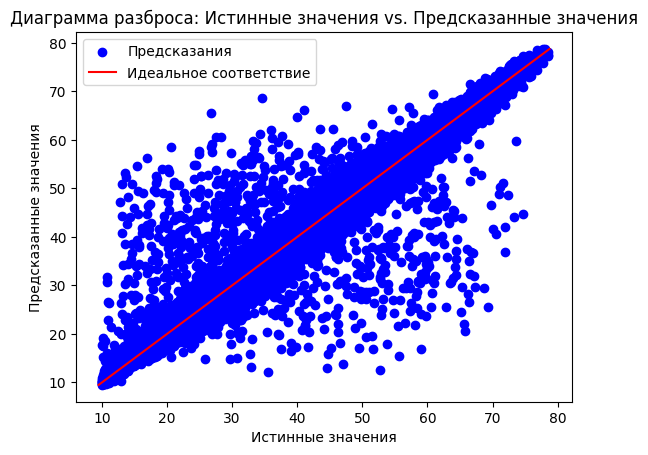

In [35]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [36]:
column_bot_temp_model.save('./models/amine_treatment_13_08/column_bot_temp_model.h5')

# Модель для определения мольных расходов компонентов верхнего продукта колонны

In [38]:
column_top_prod_comp_molar_flow_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac', 'lean_amine molar flow, kgmol/h',
    'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h', 'lean_amine Methane molar flow, kgmol/h',
    'lean_amine Ethane molar flow, kgmol/h', 'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h', 'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 'sweet_gas molar flow, kgmol/h', 'sweet_gas H2S molar flow, kgmol/h',
    'sweet_gas CO2 molar flow, kgmol/h', 'sweet_gas Methane molar flow, kgmol/h', 'sweet_gas Ethane molar flow, kgmol/h',
    'sweet_gas Propane molar flow, kgmol/h', 'sweet_gas i-Butane molar flow, kgmol/h',
    'sweet_gas n-Butane molar flow, kgmol/h', 'sweet_gas i-Pentane molar flow, kgmol/h',
    'sweet_gas n-Pentane molar flow, kgmol/h', 'sweet_gas H2O molar flow, kgmol/h',
    'sweet_gas MDEAmine molar flow, kgmol/h'
]]

In [39]:
column_top_prod_comp_molar_flow_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,...,"sweet_gas CO2 molar flow, kgmol/h","sweet_gas Methane molar flow, kgmol/h","sweet_gas Ethane molar flow, kgmol/h","sweet_gas Propane molar flow, kgmol/h","sweet_gas i-Butane molar flow, kgmol/h","sweet_gas n-Butane molar flow, kgmol/h","sweet_gas i-Pentane molar flow, kgmol/h","sweet_gas n-Pentane molar flow, kgmol/h","sweet_gas H2O molar flow, kgmol/h","sweet_gas MDEAmine molar flow, kgmol/h"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,...,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,5.128000e+05,512800.000000,5.128000e+05
mean,35.069259,149865.354606,25.727608,111.359132,0.022507,0.676686,9.990383e-02,4.999104e-02,5.000758e-02,5.000281e-02,...,5.175618e+01,3.991242e+03,5.724974e+02,2.868514e+02,2.837639e+02,2.843918e+02,1.434512e+02,2.909568e+01,7.570708,6.194997e-03
std,14.726834,86277.067509,2.254273,41.131813,0.010107,0.079301,5.771310e-02,2.888328e-02,2.889126e-02,2.883384e-02,...,6.443361e+01,2.488317e+03,4.989837e+02,2.498573e+02,2.445303e+02,2.445203e+02,1.249454e+02,2.583212e+01,8.103157,9.170009e-03
min,10.000000,1000.000000,17.630435,48.732168,0.005000,0.399159,1.653950e-07,2.931284e-07,8.852072e-08,7.172592e-08,...,2.022281e-07,3.453690e-47,2.969587e-47,3.256144e-45,8.469338e-48,8.663838e-45,2.397146e-45,4.608998e-47,0.000001,4.304260e-14
25%,22.000000,74990.500000,24.160098,85.483707,0.013747,0.619960,4.994783e-02,2.501646e-02,2.498077e-02,2.502512e-02,...,7.858073e+00,1.912269e+03,1.595103e+02,8.011673e+01,8.056913e+01,8.108536e+01,4.016463e+01,7.862526e+00,1.905496,7.740922e-04
50%,35.000000,149553.500000,25.725828,100.138569,0.022486,0.676699,9.982294e-02,4.993723e-02,4.999459e-02,5.004510e-02,...,2.459306e+01,3.823897e+03,4.329261e+02,2.169424e+02,2.167294e+02,2.173670e+02,1.083256e+02,2.161754e+01,4.653085,2.689116e-03
75%,48.000000,224502.000000,27.293888,122.779305,0.031276,0.733327,1.498145e-01,7.500006e-02,7.504631e-02,7.493642e-02,...,7.240214e+01,5.803423e+03,8.755424e+02,4.382916e+02,4.343105e+02,4.351541e+02,2.191364e+02,4.427608e+01,10.509785,7.752367e-03
max,60.000000,300000.000000,33.967309,341.551374,0.040000,0.953623,2.000000e-01,9.999965e-02,9.999968e-02,9.999981e-02,...,6.081430e+02,1.497245e+04,2.722206e+03,1.346320e+03,1.314575e+03,1.289657e+03,6.635009e+02,1.490523e+02,91.727006,1.978229e-01


In [40]:
column_top_prod_comp_molar_flow_data = column_top_prod_comp_molar_flow_data[column_top_prod_comp_molar_flow_data['sweet_gas temperature, C'] > 10]

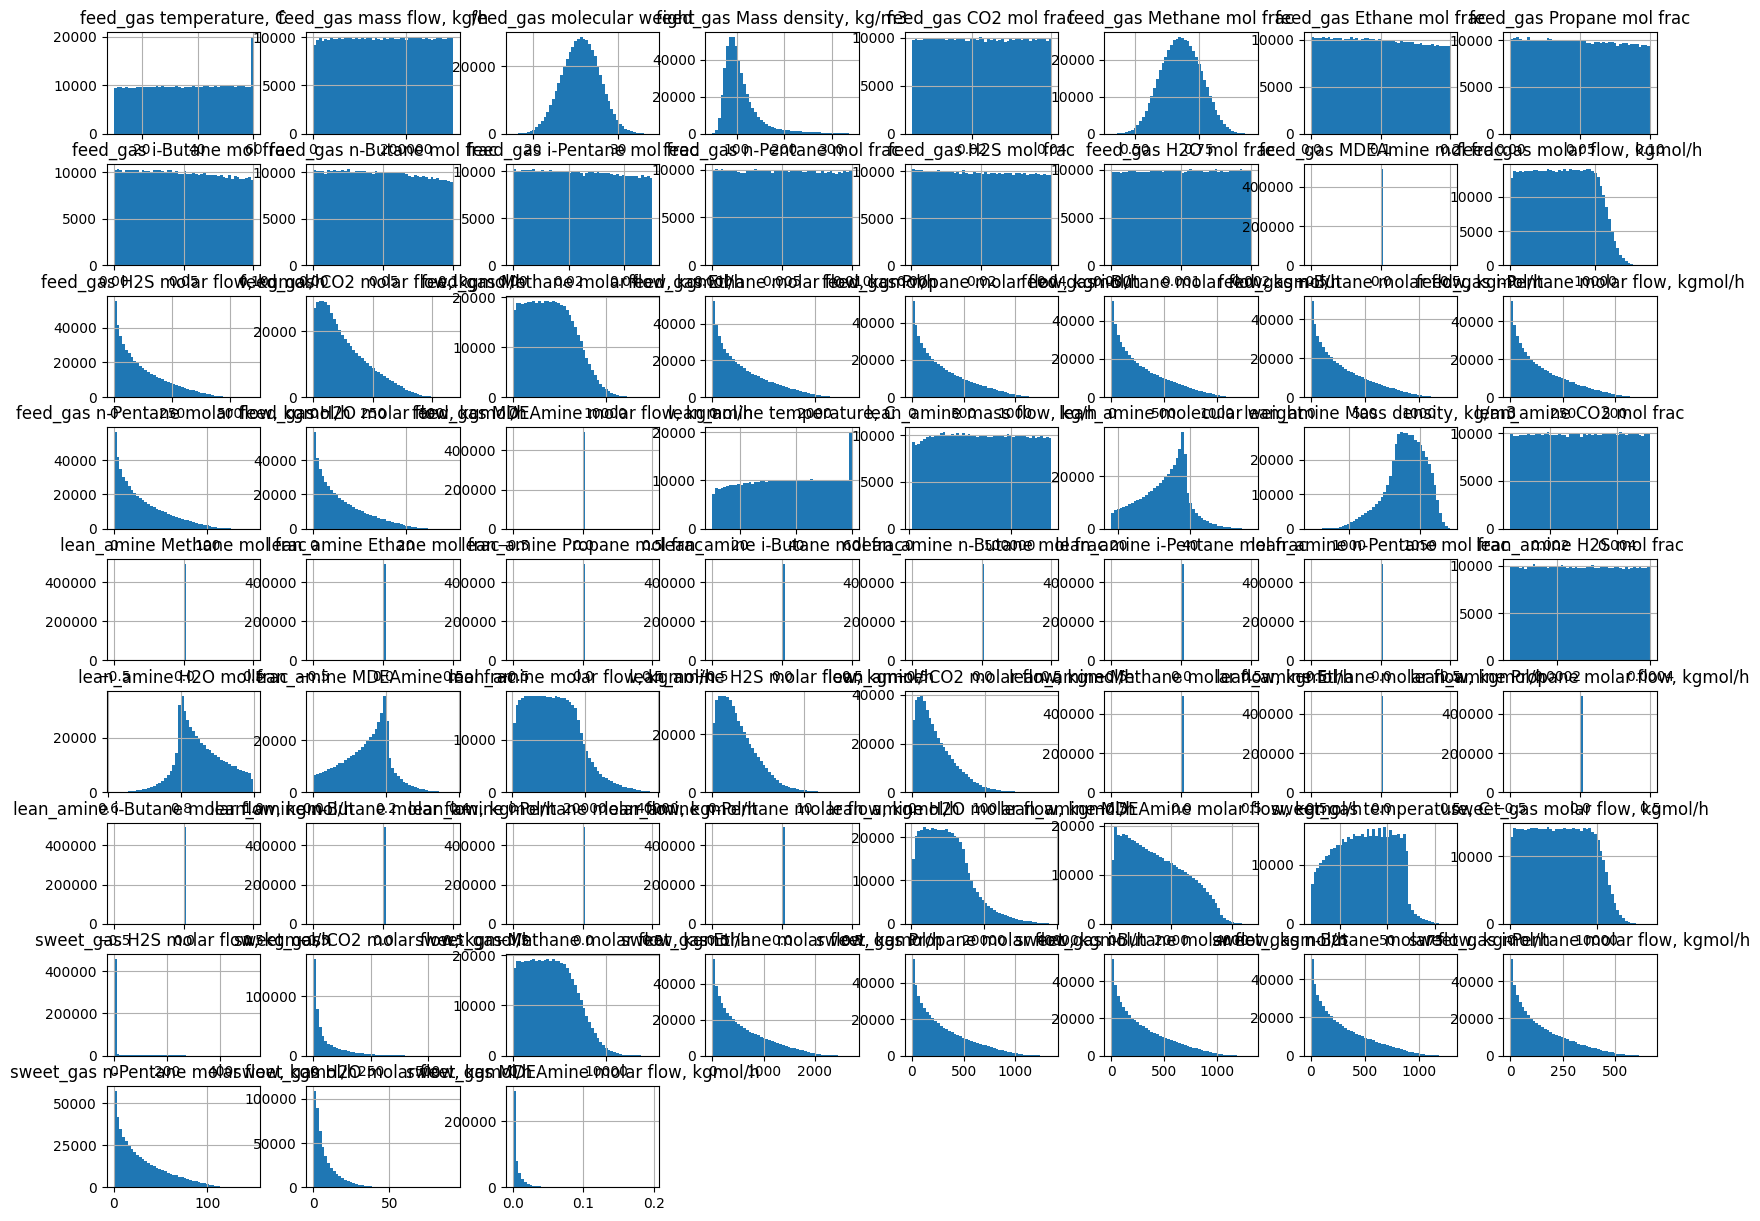

In [41]:
column_top_prod_comp_molar_flow_data.hist(bins=50, figsize=(20, 15));

In [42]:
corr_matrix = column_top_prod_comp_molar_flow_data.corr()

corr_matrix['sweet_gas H2S molar flow, kgmol/h'].sort_values(ascending=False)

sweet_gas H2S molar flow, kgmol/h           1.000000
sweet_gas CO2 molar flow, kgmol/h           0.409146
feed_gas H2S molar flow, kgmol/h            0.295964
sweet_gas H2O molar flow, kgmol/h           0.232385
sweet_gas molar flow, kgmol/h               0.207842
                                              ...   
lean_amine Propane molar flow, kgmol/h           NaN
lean_amine i-Butane molar flow, kgmol/h          NaN
lean_amine n-Butane molar flow, kgmol/h          NaN
lean_amine i-Pentane molar flow, kgmol/h         NaN
lean_amine n-Pentane molar flow, kgmol/h         NaN
Name: sweet_gas H2S molar flow, kgmol/h, Length: 67, dtype: float64

In [43]:
column_top_prod_comp_molar_flow_data_mini = column_top_prod_comp_molar_flow_data.sample(frac=0.5)

In [44]:
## Тестовая и обучающая выборки
X = column_top_prod_comp_molar_flow_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac', 'lean_amine molar flow, kgmol/h',
    'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h', 'lean_amine Methane molar flow, kgmol/h',
    'lean_amine Ethane molar flow, kgmol/h', 'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h', 'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 'sweet_gas molar flow, kgmol/h', 
]]

y = column_top_prod_comp_molar_flow_data_mini[[
    'sweet_gas H2S molar flow, kgmol/h',
    'sweet_gas CO2 molar flow, kgmol/h', 'sweet_gas Methane molar flow, kgmol/h', 'sweet_gas Ethane molar flow, kgmol/h',
    'sweet_gas Propane molar flow, kgmol/h', 'sweet_gas i-Butane molar flow, kgmol/h',
    'sweet_gas n-Butane molar flow, kgmol/h', 'sweet_gas i-Pentane molar flow, kgmol/h',
    'sweet_gas n-Pentane molar flow, kgmol/h', 'sweet_gas H2O molar flow, kgmol/h',
    'sweet_gas MDEAmine molar flow, kgmol/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac', 'lean_amine molar flow, kgmol/h',
    'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h', 'lean_amine Methane molar flow, kgmol/h',
    'lean_amine Ethane molar flow, kgmol/h', 'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h', 'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 'sweet_gas molar flow, kgmol/h', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((197016, 56), (197016, 11))

In [45]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(11)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_0_history = col_top_prod_comp_molar_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 8s 1ms/step - loss: 89.3512 - mae: 89.3512
Epoch 2/20
6157/6157 [==============================] - 7s 1ms/step - loss: 46.9804 - mae: 46.9804
Epoch 3/20
6157/6157 [==============================] - 6s 986us/step - loss: 43.3381 - mae: 43.3381
Epoch 4/20
6157/6157 [==============================] - 6s 1ms/step - loss: 38.8489 - mae: 38.8489
Epoch 5/20
6157/6157 [==============================] - 7s 1ms/step - loss: 24.7400 - mae: 24.7400
Epoch 6/20
6157/6157 [==============================] - 7s 1ms/step - loss: 10.6360 - mae: 10.6360
Epoch 7/20
6157/6157 [==============================] - 7s 1ms/step - loss: 8.8580 - mae: 8.8580
Epoch 8/20
6157/6157 [==============================] - 7s 1ms/step - loss: 7.9131 - mae: 7.9131
Epoch 9/20
6157/6157 [==============================] - 8s 1ms/step - loss: 7.2026 - mae: 7.2026
Epoch 10/20
6157/6157 [==============================] - 7s 1ms/step - loss: 6.5893 - mae: 6.5893
Epoch 11/20
615

In [46]:
eval_0 = col_top_prod_comp_molar_flow_model_0.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 1s 872us/step - loss: 4.4681 - mae: 4.4681


In [47]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(11)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_1_history = col_top_prod_comp_molar_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 8s 1ms/step - loss: 80.3349 - mae: 80.3349
Epoch 2/20
6157/6157 [==============================] - 7s 1ms/step - loss: 46.2259 - mae: 46.2259
Epoch 3/20
6157/6157 [==============================] - 8s 1ms/step - loss: 31.2273 - mae: 31.2273
Epoch 4/20
6157/6157 [==============================] - 8s 1ms/step - loss: 15.6083 - mae: 15.6083
Epoch 5/20
6157/6157 [==============================] - 7s 1ms/step - loss: 8.7377 - mae: 8.7377
Epoch 6/20
6157/6157 [==============================] - 7s 1ms/step - loss: 7.1516 - mae: 7.1516
Epoch 7/20
6157/6157 [==============================] - 8s 1ms/step - loss: 6.3901 - mae: 6.3901
Epoch 8/20
6157/6157 [==============================] - 8s 1ms/step - loss: 5.8967 - mae: 5.8967
Epoch 9/20
6157/6157 [==============================] - 8s 1ms/step - loss: 5.6197 - mae: 5.6197
Epoch 10/20
6157/6157 [==============================] - 8s 1ms/step - loss: 5.3983 - mae: 5.3983
Epoch 11/20
6157/6157

In [48]:
eval_1 = col_top_prod_comp_molar_flow_model_1.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 2s 933us/step - loss: 4.6326 - mae: 4.6326


In [49]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(11)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_2_history = col_top_prod_comp_molar_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 8s 1ms/step - loss: 76.1395 - mae: 76.1395
Epoch 2/20
6157/6157 [==============================] - 7s 1ms/step - loss: 30.6718 - mae: 30.6718
Epoch 3/20
6157/6157 [==============================] - 8s 1ms/step - loss: 11.0164 - mae: 11.0164
Epoch 4/20
6157/6157 [==============================] - 8s 1ms/step - loss: 8.7008 - mae: 8.7008
Epoch 5/20
6157/6157 [==============================] - 7s 1ms/step - loss: 7.5086 - mae: 7.5086
Epoch 6/20
6157/6157 [==============================] - 8s 1ms/step - loss: 6.8043 - mae: 6.8043
Epoch 7/20
6157/6157 [==============================] - 8s 1ms/step - loss: 6.1566 - mae: 6.1566
Epoch 8/20
6157/6157 [==============================] - 8s 1ms/step - loss: 5.7243 - mae: 5.7243
Epoch 9/20
6157/6157 [==============================] - 8s 1ms/step - loss: 5.4476 - mae: 5.4476
Epoch 10/20
6157/6157 [==============================] - 8s 1ms/step - loss: 5.3262 - mae: 5.3262
Epoch 11/20
6157/6157 [

In [52]:
eval_2 = col_top_prod_comp_molar_flow_model_2.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 2s 948us/step - loss: 4.5890 - mae: 4.5890


In [51]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(11)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_3_history = col_top_prod_comp_molar_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 9s 1ms/step - loss: 66.6968 - mae: 66.6968
Epoch 2/20
6157/6157 [==============================] - 7s 1ms/step - loss: 45.6088 - mae: 45.6088
Epoch 3/20
6157/6157 [==============================] - 8s 1ms/step - loss: 31.5160 - mae: 31.5160
Epoch 4/20
6157/6157 [==============================] - 9s 1ms/step - loss: 26.8252 - mae: 26.8252
Epoch 5/20
6157/6157 [==============================] - 9s 1ms/step - loss: 17.4135 - mae: 17.4135
Epoch 6/20
6157/6157 [==============================] - 9s 1ms/step - loss: 16.6947 - mae: 16.6947
Epoch 7/20
6157/6157 [==============================] - 9s 1ms/step - loss: 11.7171 - mae: 11.7171
Epoch 8/20
6157/6157 [==============================] - 10s 2ms/step - loss: 9.9980 - mae: 9.9980
Epoch 9/20
6157/6157 [==============================] - 9s 1ms/step - loss: 9.5603 - mae: 9.5603
Epoch 10/20
6157/6157 [==============================] - 9s 1ms/step - loss: 8.7818 - mae: 8.7818
Epoch 11/20
61

In [53]:
eval_3 = col_top_prod_comp_molar_flow_model_3.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 1s 870us/step - loss: 6.0121 - mae: 6.0121


In [54]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(11)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_4_history = col_top_prod_comp_molar_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 9s 1ms/step - loss: 67.4785 - mae: 67.4785
Epoch 2/20
6157/6157 [==============================] - 9s 1ms/step - loss: 45.7433 - mae: 45.7433
Epoch 3/20
6157/6157 [==============================] - 10s 2ms/step - loss: 24.9705 - mae: 24.9705
Epoch 4/20
6157/6157 [==============================] - 11s 2ms/step - loss: 17.9189 - mae: 17.9189
Epoch 5/20
6157/6157 [==============================] - 10s 2ms/step - loss: 17.4581 - mae: 17.4581
Epoch 6/20
6157/6157 [==============================] - 10s 2ms/step - loss: 12.9811 - mae: 12.9811
Epoch 7/20
6157/6157 [==============================] - 11s 2ms/step - loss: 10.5016 - mae: 10.5016
Epoch 8/20
6157/6157 [==============================] - 11s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 9/20
6157/6157 [==============================] - 10s 2ms/step - loss: 9.2755 - mae: 9.2755
Epoch 10/20
6157/6157 [==============================] - 10s 2ms/step - loss: 8.0791 - mae: 8.0791
Epoch

In [55]:
eval_4 = col_top_prod_comp_molar_flow_model_4.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 2s 1ms/step - loss: 5.4767 - mae: 5.4767


In [56]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(11)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_5.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_5_history = col_top_prod_comp_molar_flow_model_5.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6157/6157 [==============================] - 14s 2ms/step - loss: 69.0971 - mae: 69.0971
Epoch 2/20
6157/6157 [==============================] - 19s 3ms/step - loss: 48.3993 - mae: 48.3993
Epoch 3/20
6157/6157 [==============================] - 16s 3ms/step - loss: 30.0541 - mae: 30.0541
Epoch 4/20
6157/6157 [==============================] - 15s 2ms/step - loss: 14.5590 - mae: 14.5590
Epoch 5/20
6157/6157 [==============================] - 14s 2ms/step - loss: 11.3186 - mae: 11.3186
Epoch 6/20
6157/6157 [==============================] - 14s 2ms/step - loss: 10.0077 - mae: 10.0077
Epoch 7/20
6157/6157 [==============================] - 14s 2ms/step - loss: 8.7895 - mae: 8.7895
Epoch 8/20
6157/6157 [==============================] - 13s 2ms/step - loss: 8.3947 - mae: 8.3947
Epoch 9/20
6157/6157 [==============================] - 13s 2ms/step - loss: 8.1211 - mae: 8.1211
Epoch 10/20
6157/6157 [==============================] - 14s 2ms/step - loss: 7.9544 - mae: 7.9544
Epoch 1

In [57]:
eval_5 = col_top_prod_comp_molar_flow_model_5.evaluate(X_test_normal, y_test)

1540/1540 [==============================] - 2s 976us/step - loss: 4.2815 - mae: 4.2815


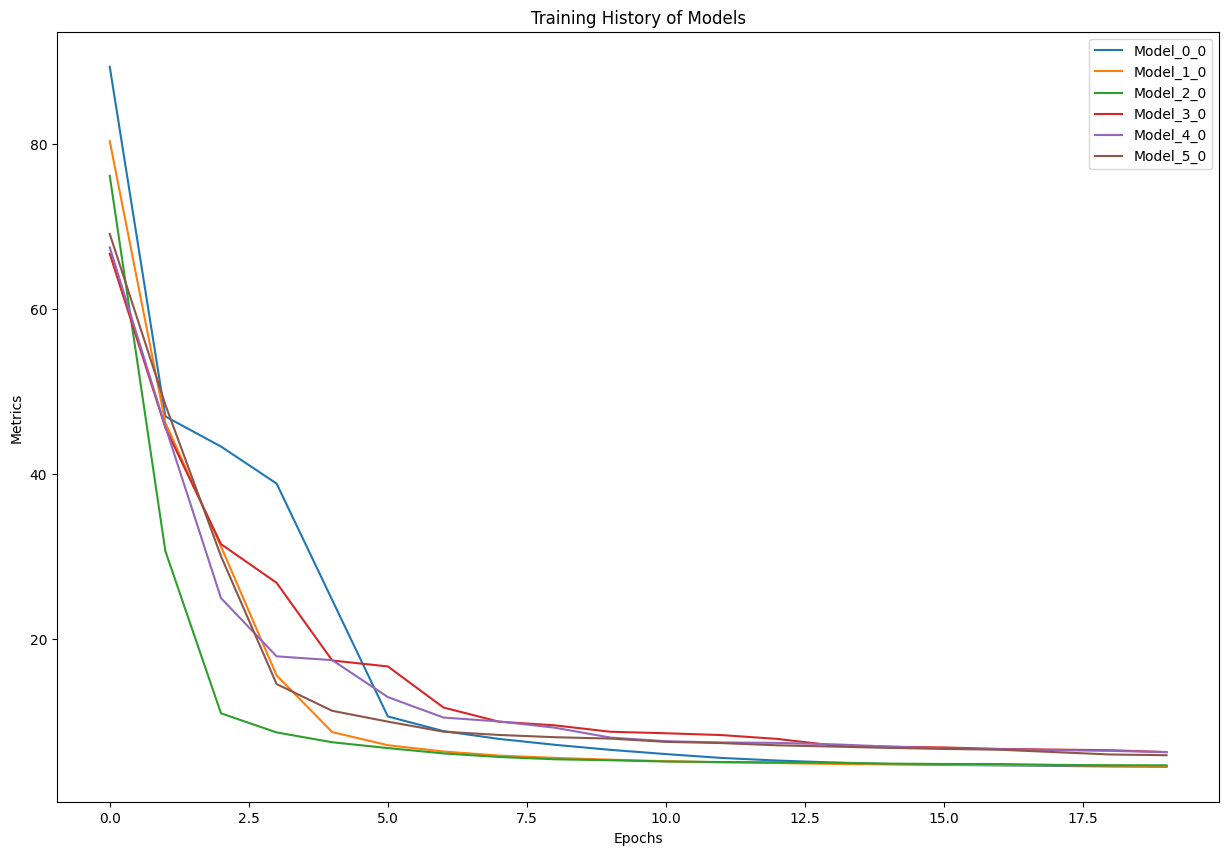

In [58]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(col_top_prod_comp_molar_flow_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(col_top_prod_comp_molar_flow_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(col_top_prod_comp_molar_flow_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(col_top_prod_comp_molar_flow_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(col_top_prod_comp_molar_flow_4_history.history['loss']).add_prefix('Model_4_')
history_5_df = pd.DataFrame(col_top_prod_comp_molar_flow_5_history.history['loss']).add_prefix('Model_5_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df, history_5_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

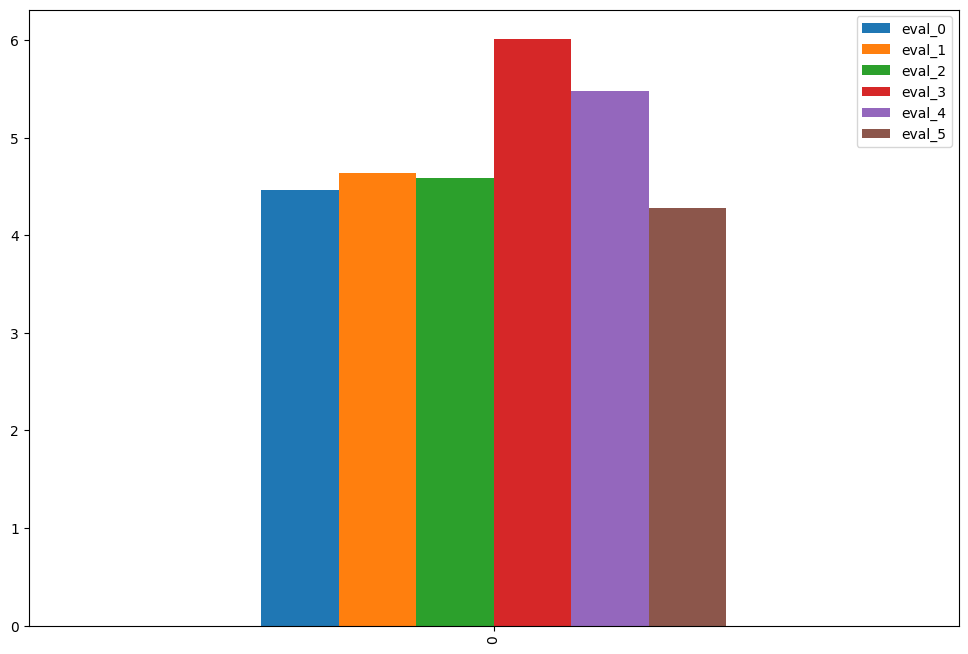

In [59]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
    'eval_5': eval_5[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения молярных расходов компонентов верхнего продукта колонны

In [61]:
## Тестовая и обучающая выборки
X = column_top_prod_comp_molar_flow_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac', 'lean_amine molar flow, kgmol/h',
    'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h', 'lean_amine Methane molar flow, kgmol/h',
    'lean_amine Ethane molar flow, kgmol/h', 'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h', 'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 'sweet_gas molar flow, kgmol/h', 
]]

y = column_top_prod_comp_molar_flow_data[[
    'sweet_gas H2S molar flow, kgmol/h',
    'sweet_gas CO2 molar flow, kgmol/h', 'sweet_gas Methane molar flow, kgmol/h', 'sweet_gas Ethane molar flow, kgmol/h',
    'sweet_gas Propane molar flow, kgmol/h', 'sweet_gas i-Butane molar flow, kgmol/h',
    'sweet_gas n-Butane molar flow, kgmol/h', 'sweet_gas i-Pentane molar flow, kgmol/h',
    'sweet_gas n-Pentane molar flow, kgmol/h', 'sweet_gas H2O molar flow, kgmol/h',
    'sweet_gas MDEAmine molar flow, kgmol/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas CO2 mol frac', 'feed_gas Methane mol frac', 'feed_gas Ethane mol frac', 'feed_gas Propane mol frac',
    'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac', 'feed_gas i-Pentane mol frac',
    'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac', 'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac', 'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac',
    'lean_amine H2S mol frac', 'lean_amine H2O mol frac', 'lean_amine MDEAmine mol frac', 'lean_amine molar flow, kgmol/h',
    'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h', 'lean_amine Methane molar flow, kgmol/h',
    'lean_amine Ethane molar flow, kgmol/h', 'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h', 'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas temperature, C', 'sweet_gas molar flow, kgmol/h', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_prod_comp_molar_flow.pkl')

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((394033, 56), (394033, 11))